## Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv('Diabetes-prediction.csv')

In [3]:

df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140,0
1,1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,2,Male,28.0,0,0,never,27.32,5.7,158,0
3,3,Female,36.0,0,0,current,23.45,5.0,155,0
4,4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.columns

Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

In [5]:
# Droping columns Unnamed: 0, since it has no meaning

df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# Converting age to integer

df['age'] = df['age'].astype(int)

**Checking data information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


**Checking for null values**

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Checking for unique value for each of the feature**

In [27]:
for feature in df.columns:
  print(f"Unique value of {feature}  {df[feature].unique()}\n")

Unique value of gender  ['Female' 'Male' 'Other']

Unique value of age  [80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  0 33 16 61 31  8 49 39 65 14 70 48
 51 71 64 63 52 10 35 23  1]

Unique value of hypertension  [0 1]

Unique value of heart_disease  [1 0]

Unique value of smoking_history  ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique value of bmi  [25.19 27.32 23.45 ... 59.42 44.39 60.52]

Unique value of HbA1c_level  [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]

Unique value of blood_glucose_level  [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]

Unique value of diabetes  [0 1]



## Exploratory Data Analysis

**Distribution plot**

Distribution plot is a graphical representation that consists of a single horizontal or vertical axis representing categories, and the height (or width) of each bar in the plot corresponds to the count or frequency of data points falling into each category. Each unique category in the dataset is represented by a separate bar, and the count of occurrences within each category is indicated by the height of the corresponding bar.

Distribution of Gender

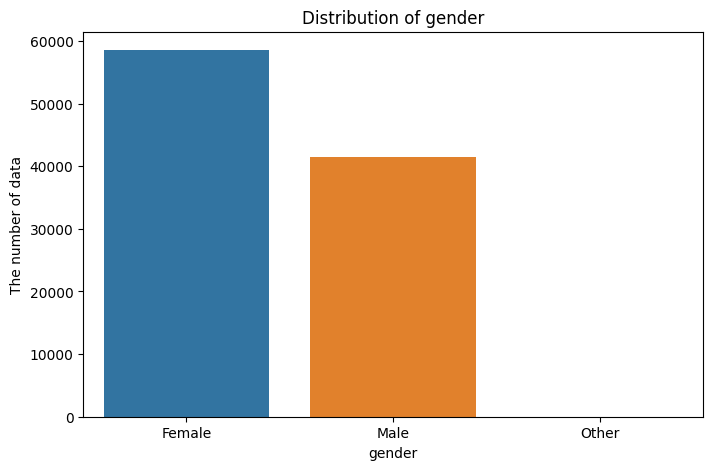

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'gender')
plt.title(f"Distribution of gender")
plt.xlabel(f"gender")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The bar chart shows the distribution of gender within a dataset. Here's an analysis based on the visual information:

 - Female: The first bar, in blue, represents female data points, which are the highest among the three categories, with a count of approximately 60,000.
 - Male: The second bar, in orange, represents male data points, which are slightly fewer than the female ones, with a count of around 50,000.
 - Other: The third bar, representing an 'Other' gender category, is significantly smaller, indicating a much lower count in the dataset, but the exact number is unclear as the bar is too small to estimate from the chart.

 
Key Observations:

The dataset contains more female data points than male.
The 'Other' category is substantially underrepresented compared to the binary gender options.
The chart is titled "Distribution of gender," indicating that the purpose of the chart is to illustrate the gender breakdown of a particular population or dataset.

Distribution of Hypertension

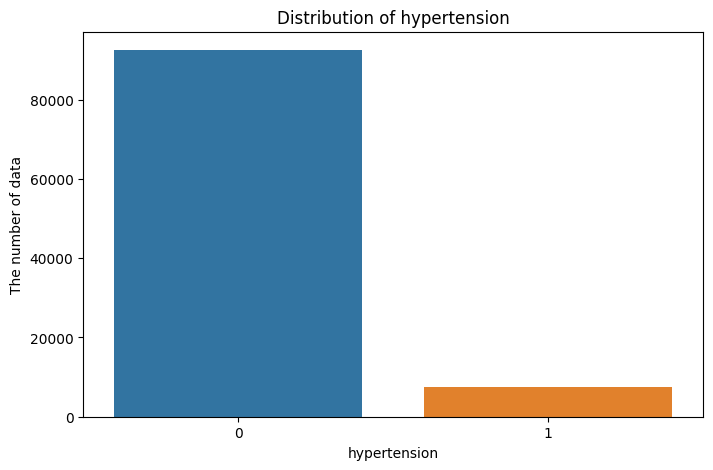

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'hypertension')
plt.title(f"Distribution of hypertension")
plt.xlabel(f"hypertension")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The bar chart depicts the distribution of hypertension within a given dataset, categorized by 0 (no hypertension) and 1 (hypertension).

 - 0 (No Hypertension): The first bar, shown in blue, represents individuals without hypertension. The count for this category is the highest on the chart, with a number just above 80,000.

 - 1 (Hypertension): The second bar, shown in orange, represents individuals with hypertension. This category has a significantly lower count compared to the non-hypertension group, with a number around 12,000.

Key Observations:

A large majority of the dataset consists of individuals without hypertension.
Those with hypertension represent a much smaller portion of the dataset.
The title "Distribution of hypertension" suggests that the chart's purpose is to show the prevalence or incidence of hypertension in the sampled population. This kind of chart can be used in medical research, public health studies, or healthcare planning to understand the burden of hypertension within a community or population.

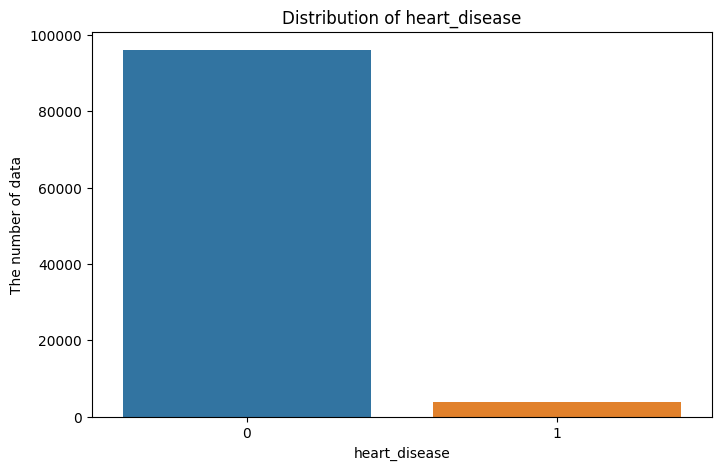

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'heart_disease')
plt.title(f"Distribution of heart_disease")
plt.xlabel(f"heart_disease")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The bar chart you've provided shows the distribution of heart disease within a dataset, categorized as 0 (no heart disease) and 1 (heart disease).

0 (No Heart Disease): The first bar, in blue, represents individuals without heart disease. This category has a very large number, which appears to be close to 100,000.

1 (Heart Disease): The second bar, in orange, represents individuals with heart disease. The count for this group is substantially lower, with the top of the bar reaching to about the 10,000 mark on the y-axis.

Key Observations:

There is a significant discrepancy between the number of individuals with and without heart disease, with the majority being in the no heart disease category.
The chart is titled "Distribution of heart disease," suggesting the data is likely used to understand the prevalence of heart disease in the sampled population.

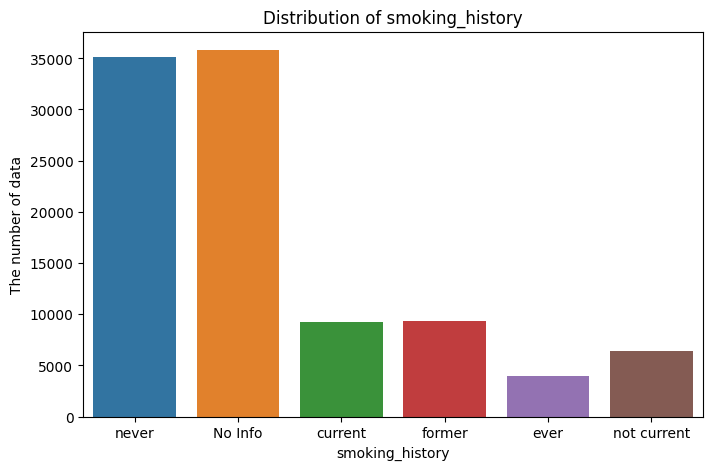

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'smoking_history')
plt.title(f"Distribution of smoking_history")
plt.xlabel(f"smoking_history")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The bar chart provides information on the smoking history of a dataset with the following categories:

Never: The first bar, colored in blue, represents individuals who have never smoked. This group has the highest count, with over 30,000 data points.

No Info: The second bar, in orange, indicates individuals for whom there is no information about smoking history. It is nearly as high as the 'never' category, suggesting a large portion of the data is missing this information.

Current: The third bar, in green, shows current smokers. The count for this category is much lower, around 7,500.

Former: The fourth bar, in red, represents former smokers. This count is slightly higher than the current smokers, close to 10,000.

Ever: The fifth bar, in purple, is for those who have ever smoked. This is not clearly distinguishable from 'former' smokers in this context and appears to be a smaller number, around 5,000.

Not Current: The last bar, in brown, indicates individuals who are not current smokers. This could include never, former, and those with no info on smoking. It's slightly less than the 'ever' category, suggesting a count of around 4,000.

Key Observations:

The majority of the dataset consists of individuals who have never smoked or for whom there is no information available.
Current smokers make up a smaller portion of the dataset compared to former smokers.
The 'ever' and 'not current' categories may require further clarification to understand their distinction from 'former' smokers.

Distribution of Age

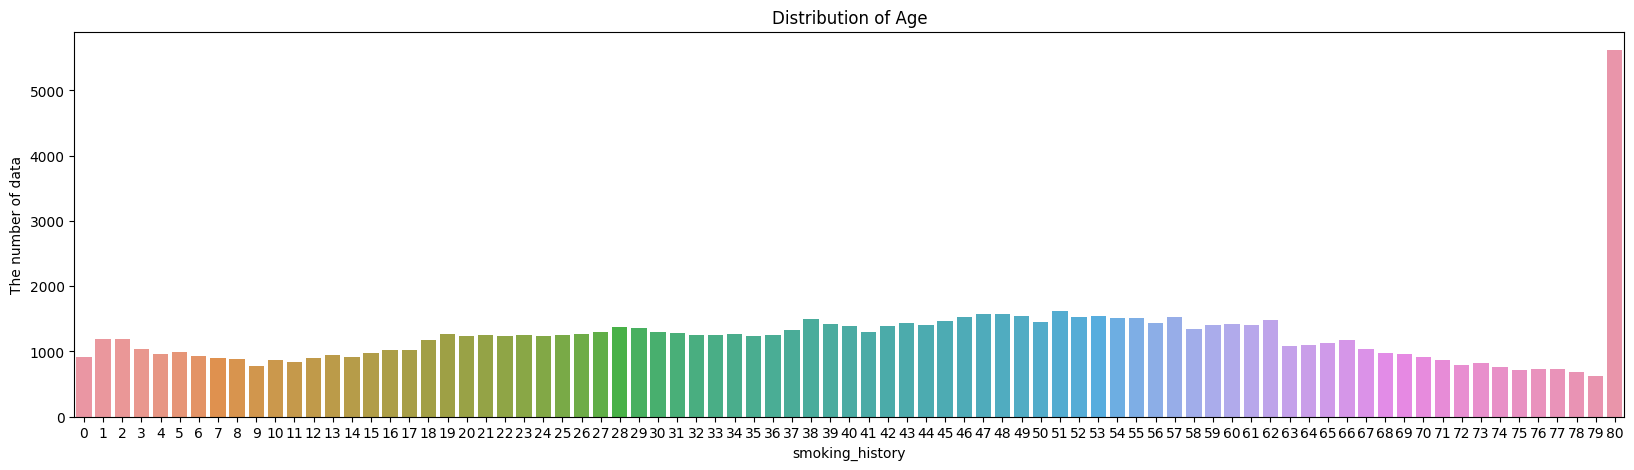

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'age')
plt.title(f"Distribution of Age")
plt.xlabel(f"smoking_history")
plt.ylabel("The number of data")
plt.show()

Analysis

1. Age Range: The chart covers an age range from 0 to 80 years old.

2. Data Distribution: The distribution is not uniform. There are peaks at the beginning and end of the age range, with the highest bars at the age of 0 and 80. This could suggest a larger number of observations or individuals with a smoking history at these ages, or it might be a representation of certain age groups being more likely to have a recorded smoking history.

3. Color Gradient: The bars are color-coded, transitioning from red to green to blue and back to red as age increases. The use of color might be intended to represent different categories or to simply enhance the visual distinction between ages.

4. Data Trends: The central age groups (roughly from 20 to 60) have more uniform bar heights compared to the younger (0-19) and older (61-80) age groups. This might indicate a more consistent data count for these age groups.

Distribution of BMI

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


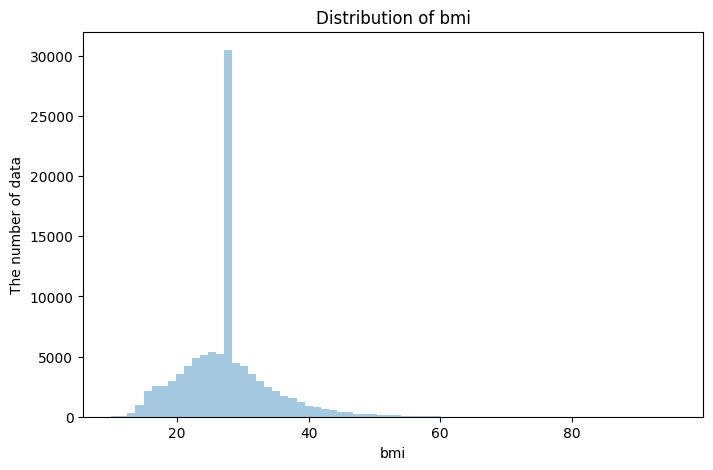

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(df['bmi'],bins=70, kde=False)
plt.title(f"Distribution of bmi")
plt.xlabel(f"bmi")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The histogram depicts the distribution of body mass index (BMI) values within a dataset. The x-axis represents BMI values, while the y-axis represents the number of data points corresponding to each BMI value.

Key Observations:

The distribution is sharply peaked around a BMI value of approximately 20-30, which suggests that the majority of individuals in this dataset have a BMI within this range. This peak represents the mode of the dataset.
There is a long tail to the right of the peak, which indicates that there are fewer individuals with higher BMI values.
The distribution appears to be right-skewed, meaning that the tail on the right side of the distribution is longer than the left side, which is typical for BMI distributions in many populations.

Distribution of HbA1c level

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


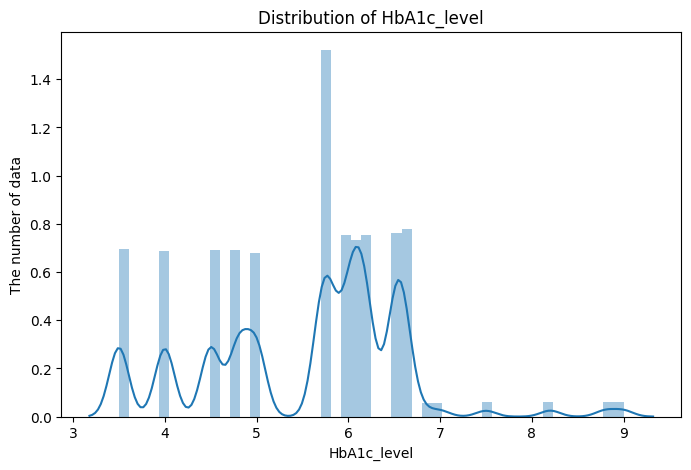

In [55]:
plt.figure(figsize=(8,5))
sns.distplot(df['HbA1c_level'])
plt.title(f"Distribution of HbA1c_level")
plt.xlabel(f"HbA1c_level")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The chart you've provided is a histogram overlaid with a line graph, showing the distribution of HbA1c levels in a dataset.

Key Observations:

The distribution has multiple peaks, which could suggest different subpopulations within the dataset or measurement intervals.
The most prominent peak occurs just above the HbA1c level of 6, which is a critical threshold in diabetes management. Values of 6.5% or higher typically indicate diabetes.
There are other smaller peaks at lower HbA1c levels, which could correspond to non-diabetic individuals or those with well-controlled blood sugar levels.
The y-axis is labeled in relative frequency (normalized count) rather than absolute numbers, which allows for comparison of the prevalence of each HbA1c level.

Distribution of Blood Glucose Level

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


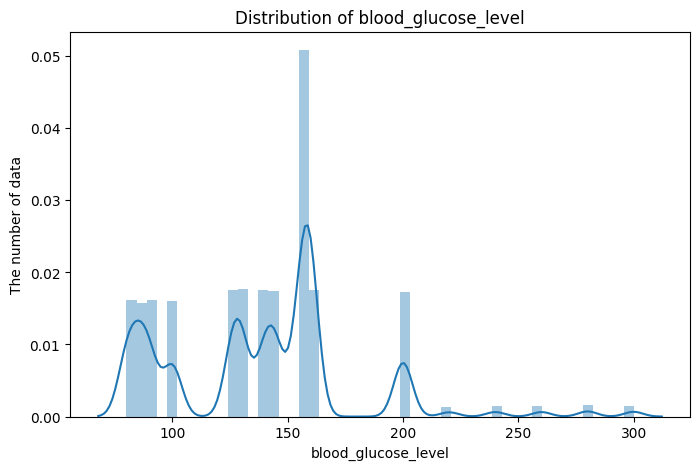

In [56]:
plt.figure(figsize=(8,5))
sns.distplot(df['blood_glucose_level'])
plt.title(f"Distribution of blood_glucose_level")
plt.xlabel(f"blood_glucose_level")
plt.ylabel("The number of data")
plt.show()

**Analysis**

The chart depicts the distribution of blood glucose levels in a dataset, shown as a histogram with a line graph overlay.

Key Observations:

There are several peaks in the distribution, indicating that the blood glucose levels are clustered around certain values.
The tallest peak is around the 150 mg/dL mark, which is above normal fasting glucose levels (typically 70 to 99 mg/dL), indicating a possible prevalence of higher than normal blood glucose readings in the dataset.
There are smaller peaks at intervals both below and above the largest peak, which could suggest the presence of different subpopulations within the dataset, such as individuals with normal glucose levels, pre-diabetes, and diabetes.
The distribution has a long tail extending to the right, which shows that there are fewer individuals with very high blood glucose levels, although such extreme values do exist in the dataset.

Distribution of Diabetes

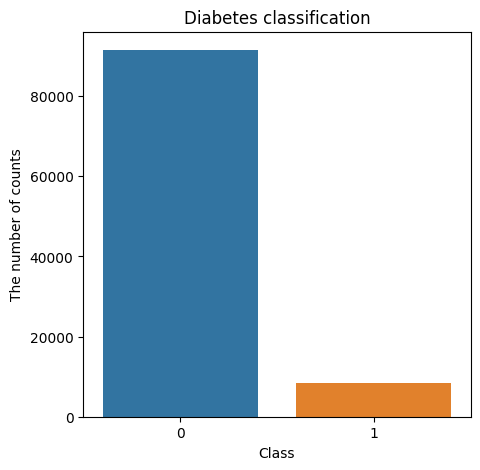

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'diabetes')
plt.title("Diabetes classification")
plt.xlabel("Class")
plt.ylabel("The number of counts")
plt.show()

**Analysis**

The bar chart provided is titled "Diabetes classification" and it represents the distribution of a binary classification for diabetes, with the two classes represented as 0 and 1.

Class 0: The first bar, colored in blue, represents the count of individuals classified as not having diabetes (or potentially representing a control group). The number of counts for this class is very high, reaching to approximately 90,000.

Class 1: The second bar, colored in orange, represents individuals classified as having diabetes. This group has a significantly lower count compared to class 0, with a number around 10,000.

Key Observations:

The dataset contains a much larger number of non-diabetic (or control) individuals compared to those classified as diabetic.
Such a chart could be used in medical research to show the distribution of participants in a study or the prevalence of diabetes within a sampled population.

**Pairplot**

A pair plot, also known as a scatterplot matrix, is a graphical representation used in data analysis and data visualization to explore the relationships between multiple variables in a dataset. It is particularly helpful when dealing with multivariate data, where you have several numerical variables, and you want to understand how they relate to each other.

A pair plot is created by plotting pairwise scatterplots for each combination of variables in the dataset. It displays scatterplots in a grid-like fashion, with variables plotted on both the x-axis and y-axis. The diagonal of the grid typically contains histograms or kernel density plots for each individual variable.

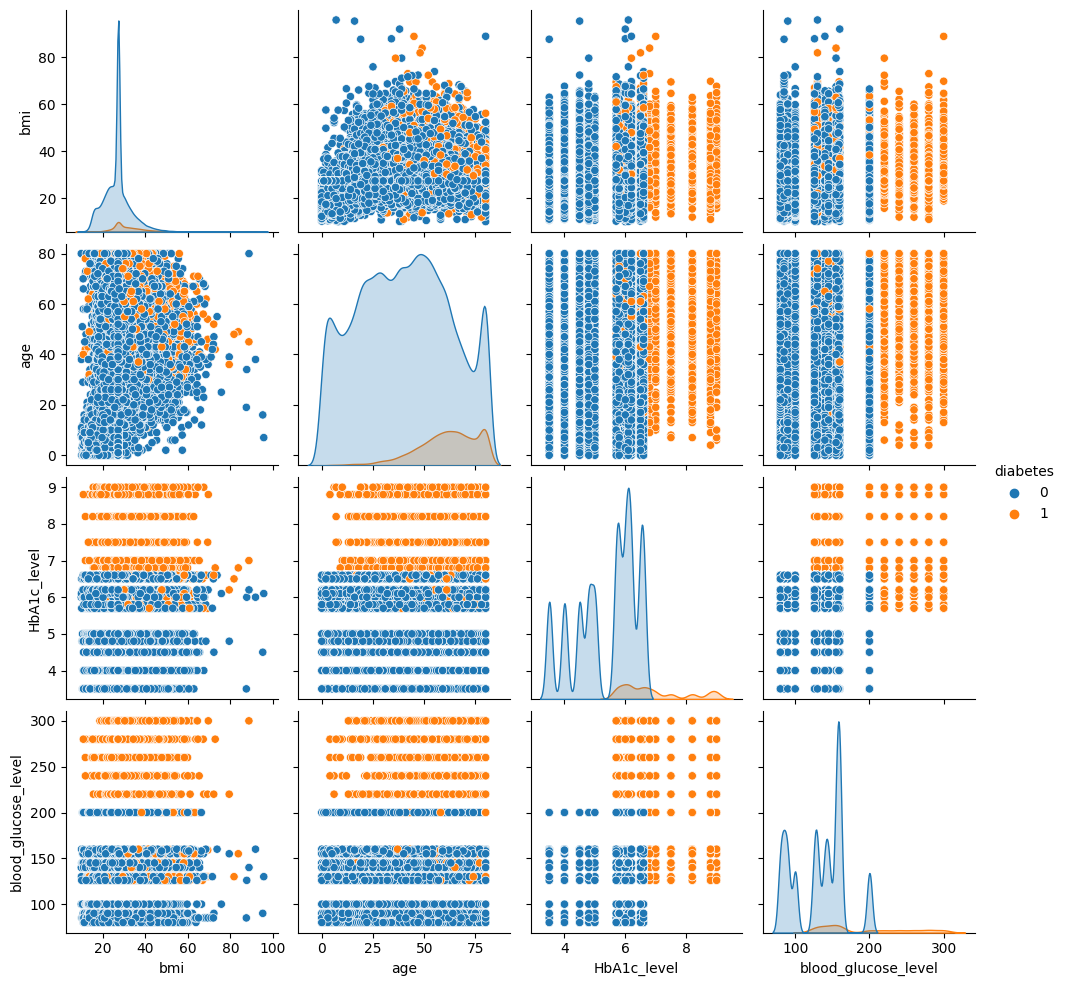

In [62]:
sns.pairplot(df[['bmi','age','HbA1c_level','blood_glucose_level','diabetes']], hue='diabetes',diag_kind='kde')
plt.show()

**Analysis**

This is the series of scatter plots and histograms, often called a pair plot, which is used to visualize the distribution of multiple variables and the relationships between them. This particular pair plot seems to be comparing four different variables: BMI, age, HbA1c level, and blood glucose level. It also differentiates between two classes, likely representing individuals with diabetes (1) and without diabetes (0), based on the legend in the bottom right.

From the diagonal histograms:

The BMI histogram shows a right-skewed distribution, suggesting that while most individuals have a BMI in the normal to slightly overweight range, there is a significant number with a high BMI.
The Age histogram seems to have a more uniform distribution with a slight peak around the 50-60 year age range.
The HbA1c level histogram has a sharp peak around the value 6, with a tail extending to higher values.
The Blood glucose level histogram has several peaks, the largest one is just above the 100 mg/dL mark.
From the scatter plots:

BMI vs. Age: No clear pattern, suggesting that BMI does not vary significantly with age in this dataset.
BMI vs. HbA1c level: There appears to be a cluster of diabetic individuals with higher BMI and HbA1c levels.
BMI vs. Blood glucose level: Similar to BMI vs. HbA1c, indicating a relationship between higher BMI and higher blood glucose levels among diabetic individuals.
Age vs. HbA1c level and Age vs. Blood glucose level: There are no clear trends, suggesting that age alone may not be a strong predictor of HbA1c or blood glucose levels.
HbA1c level vs. Blood glucose level: There appears to be a positive correlation, as expected since both are indicators of blood sugar control.
The plots with orange dots representing individuals with diabetes generally show higher values of BMI, HbA1c, and blood glucose levels compared to the blue dots, which represent individuals without diabetes.

**Box plot**

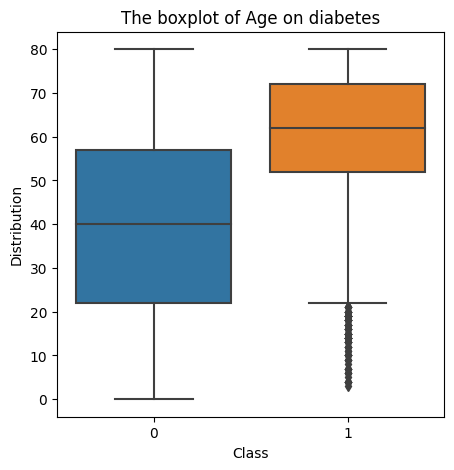

In [65]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'diabetes',y = 'age')
plt.title(f"The boxplot of Age on diabetes")
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.show()

**Analysis**

The image shows a boxplot comparing the age distribution of two classes, likely representing individuals without diabetes (Class 0) and with diabetes (Class 1).

Key Observations from the boxplot:

Class 0 (No Diabetes): The blue boxplot for Class 0 indicates that the median age is around 30 years. The interquartile range (IQR), which represents the middle 50% of the data, spans from approximately 20 to 40 years of age. There are some outliers indicated by the individual points, which suggest that there are individuals outside the general age distribution, both younger and older.

Class 1 (Diabetes): The orange boxplot for Class 1 shows a higher median age compared to Class 0, around 50 years. The IQR extends from about 40 to 60 years of age. This indicates that individuals with diabetes in this dataset are generally older. There is a wider range of ages represented, including younger and older individuals, with outliers on the lower end.

Other Points:

The age range for individuals with diabetes (Class 1) is broader than for those without diabetes (Class 0), which suggests that diabetes is present across a wider age spectrum but is more central among middle-aged to older individuals.
The fact that the median age is higher for the diabetic group may reflect the increased risk of developing diabetes with age.
Outliers in Class 1, particularly the younger ages, might indicate cases of Type 1 diabetes or early onset of Type 2 diabetes.

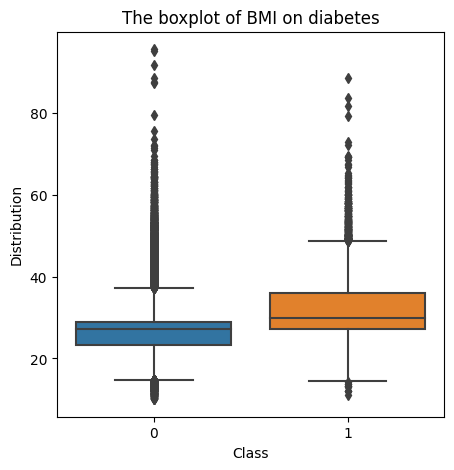

In [66]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'diabetes',y = 'bmi')
plt.title(f"The boxplot of BMI on diabetes")
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.show()

**Analysis**

The image shows a boxplot comparing the Body Mass Index (BMI) distribution of two classes, presumably representing individuals without diabetes (Class 0) and with diabetes (Class 1).

Key Observations from the boxplot:

Class 0 (No Diabetes): The blue boxplot for Class 0 suggests that the median BMI is just above 20, which falls within the normal weight range as defined by standard BMI categories. The interquartile range (IQR) is narrow, showing that the middle 50% of individuals are clustered within a relatively small range of BMI values. There are many outliers on both the lower and higher ends of the BMI scale.

Class 1 (Diabetes): The orange boxplot for Class 1 indicates a higher median BMI, slightly above 30, which is commonly considered the threshold for obesity. The IQR is wider than that of Class 0, suggesting more variability in BMI among individuals with diabetes. Like Class 0, there are several outliers on both the lower and higher ends.

General Observations:

The median BMI for individuals with diabetes is higher than for those without, which aligns with the well-established link between higher BMI and the risk of developing diabetes.
The presence of outliers in both classes indicates that while there is a general trend, BMI is not the sole factor in diabetes risk, as there are individuals with high BMI without diabetes and vice versa.
The data suggests that diabetes prevalence is higher amongst individuals with a higher BMI.

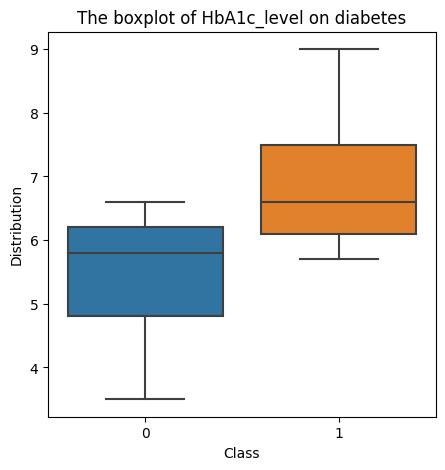

In [68]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'diabetes',y = 'HbA1c_level')
plt.title(f"The boxplot of HbA1c_level on diabetes")
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.show()

**Analysis**

The image shows a boxplot comparing the HbA1c levels of two classes, which likely represent individuals without diabetes (Class 0) and with diabetes (Class 1).

Key Observations:

Class 0 (No Diabetes): The blue boxplot for Class 0 indicates that the median HbA1c level is just below 6%, which is generally considered the upper limit of the normal range. The interquartile range (IQR) is relatively tight, suggesting that most individuals in this class have HbA1c levels clustered closely around the median. The range of HbA1c levels, indicated by the whiskers, extends from just above 4% to just below 7%.

Class 1 (Diabetes): The orange boxplot for Class 1 shows a median HbA1c level that is above 7%, which is the threshold commonly used to diagnose diabetes. The IQR is broader compared to Class 0, indicating greater variability in HbA1c levels among individuals with diabetes. The range of HbA1c levels in this class extends from around 6% to above 8%, with the whiskers indicating the range of typical values.

General Observations:

Individuals with diabetes (Class 1) have higher median HbA1c levels and a broader range of values compared to those without diabetes (Class 0).
The HbA1c levels for Class 0 are mostly below the diabetes diagnostic threshold, while the levels for Class 1 are mostly above it.
There are no visible outliers in either class, suggesting that the data does not contain extreme values that fall far from the general distribution.

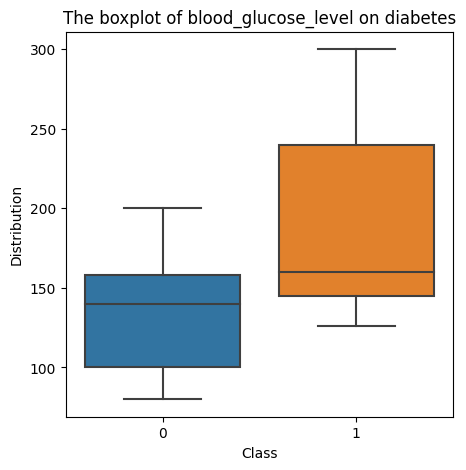

In [70]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = 'diabetes',y = 'blood_glucose_level')
plt.title(f"The boxplot of blood_glucose_level on diabetes")
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.show()

**Analysis**

The image shows a boxplot comparing the blood glucose levels of two classes, likely representing individuals without diabetes (Class 0) and with diabetes (Class 1).

Key Observations:

Class 0 (No Diabetes): The blue boxplot for Class 0 shows a median blood glucose level that is around the upper end of the normal fasting glucose range (70 to 99 mg/dL). The interquartile range (IQR) is quite compact, indicating that most individuals in this class have blood glucose levels that are relatively close to the median. The total range, indicated by the whiskers, does not seem to go much beyond 125 mg/dL, which is the threshold for pre-diabetes.

Class 1 (Diabetes): The orange boxplot for Class 1 shows a median blood glucose level significantly higher than the normal range, well into the diabetic range (typically 126 mg/dL and above for fasting glucose levels). The IQR is much broader than Class 0, suggesting a higher variability in blood glucose levels among individuals with diabetes. The range extends from just below 125 mg/dL to over 250 mg/dL, with some individuals having extremely high blood glucose levels.

General Observations:

The median blood glucose level for individuals with diabetes (Class 1) is higher than for those without diabetes (Class 0), which aligns with the characteristic high blood glucose levels associated with diabetes.
There is a significant overlap in the ranges of blood glucose levels between the two classes, particularly in the lower range of Class 1, which could include individuals with well-controlled diabetes or those in the early stages of the disease.
The presence of high values in the Class 1 boxplot reflects the high blood glucose levels that are a hallmark of uncontrolled diabetes.

## Interesting Analysis

**Age Distribution and Health Conditions Analyses**

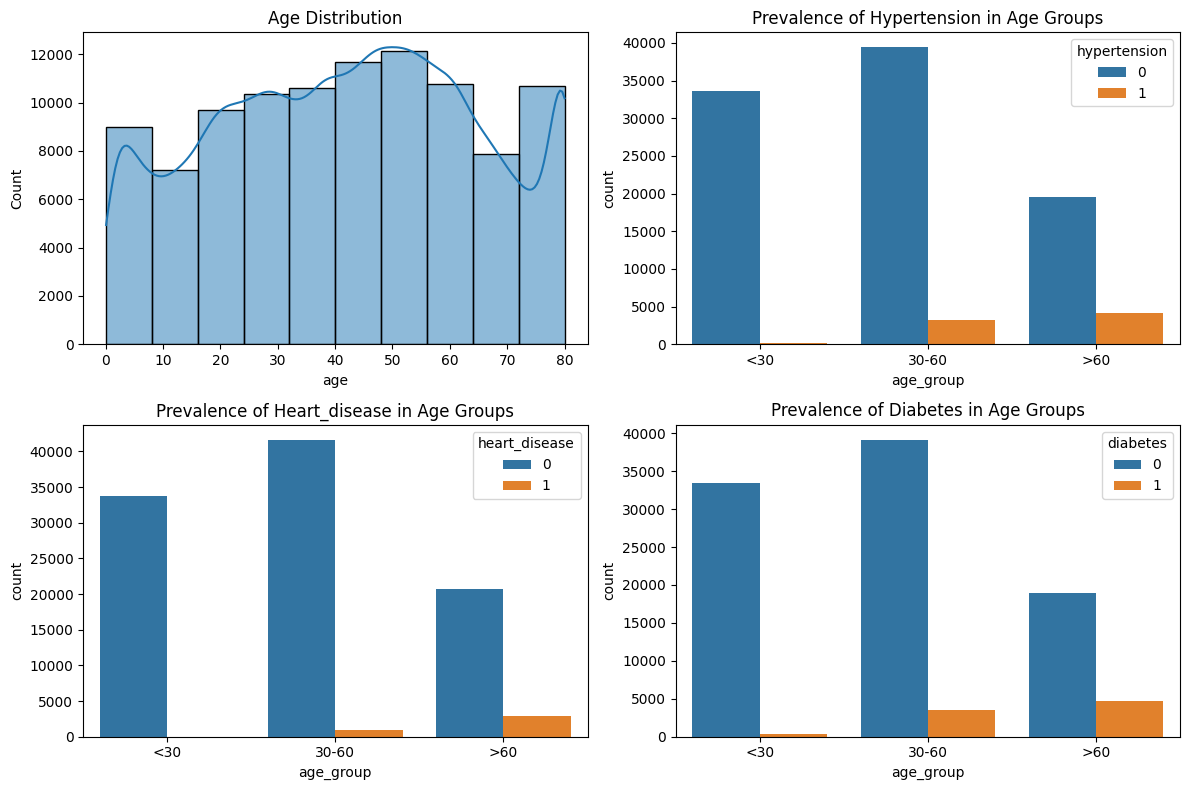

In [8]:
# Age Group Analysis
age_groups = pd.cut(df['age'], bins=[0, 30, 60, 90], labels=["<30", "30-60", ">60"])
df['age_group'] = age_groups

# Visualization
plt.figure(figsize=(12, 8))

# Histogram for Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')

# Bar Charts for Conditions in Age Groups
conditions = ['hypertension', 'heart_disease', 'diabetes']
for i, condition in enumerate(conditions, 2):
    plt.subplot(2, 2, i)
    sns.countplot(x='age_group', data=df, hue=condition)
    plt.title(f'Prevalence of {condition.capitalize()} in Age Groups')

plt.tight_layout()
plt.show()

Benefits

The analysis of age distribution in relation to health conditions like hypertension, heart disease, and diabetes offers several significant benefits:

1. Understanding Disease Prevalence and Risk Factors: By examining how these conditions correlate with age, healthcare professionals and researchers can better understand the risk factors associated with different life stages. This can inform both preventative strategies and treatment approaches.

2. Targeted Healthcare Policies and Programs: The insights from such analysis can guide public health policies and the allocation of resources. For example, if certain conditions are found to be more prevalent in older age groups, healthcare systems can prioritize screening and intervention programs for these populations.

3. Improving Patient Care: Knowledge of age-related prevalence of diseases can help clinicians in making more informed decisions regarding patient care. For instance, older patients might be more closely monitored for heart disease if the data suggests a higher risk.

4. Informing Public Awareness and Education: Public health campaigns can use this data to tailor their messages and educational programs. If younger age groups show an increased prevalence of a condition traditionally associated with older age, this can be a critical insight for public awareness initiatives.

5. Guiding Future Research: Such analysis can highlight areas where further research is needed, such as investigating why certain age groups are more susceptible to specific conditions or exploring the effectiveness of different treatment strategies across age groups.

6. Personalized Medicine: In the era of personalized medicine, understanding the correlation between age and health conditions is vital. It can lead to more personalized treatment plans that consider an individual's age, among other factors.

7. Healthcare Cost Management: By identifying high-risk age groups, healthcare providers and insurers can better manage resources and costs associated with treatment and care of chronic conditions.

Result Analysis

The provided visualizations offer insights into the age distribution and the prevalence of hypertension, heart disease, and diabetes within a specific population. Here's an analysis of the charts:

1. Age Distribution: The histogram shows the number of individuals at different ages. It appears to be a relatively normal distribution with a slight right skew, indicating a larger proportion of the population is in the middle-age to older adult range.

2. Prevalence of Hypertension in Age Groups:
The bar chart suggests that the prevalence of hypertension is highest in the 30-60 age group, followed by the <30 age group, with the >60 age group showing the lowest prevalence. This is somewhat unusual as hypertension typically increases with age.

3. Prevalence of Heart Disease in Age Groups:
The incidence of heart disease is significantly higher in the 30-60 age group compared to the other groups. The >60 age group, while still having cases, shows fewer instances than might be expected, as age is a known risk factor for heart disease.

4. Prevalence of Diabetes in Age Groups:
Diabetes prevalence is highest in the 30-60 age group, followed by the <30 age group. Similar to hypertension, the >60 age group has the lowest prevalence, which is atypical given that the risk of diabetes generally increases with age.

**Key Points from the Analysis:**
The bulk of hypertension, heart disease, and diabetes cases are in the 30-60 age group.
The >60 age group has fewer cases of these conditions than expected. This could be due to a variety of factors such as smaller population size in this age group, successful management of conditions, or survivorship bias where individuals with these conditions may not have survived to older age.
The <30 age group has a relatively low prevalence of these conditions, which aligns with expectations since these are typically more common in older adults.


**Considerations:**
The data may not be representative of the general population, especially if the sample size is small or not randomly selected.
There may be external factors influencing these results, such as healthcare access, lifestyle, and genetic predispositions in the population sampled.
It's important to consider the absolute numbers in conjunction with population sizes for these age groups, which are not provided in the charts.

**Next Steps:**
Further investigation is needed to understand why the older age group shows a lower prevalence of these conditions.
Additional data on lifestyle factors, genetic information, and socioeconomic status could provide more context for these patterns.
Comparing these results to a broader dataset or different populations would be necessary to draw more generalized conclusions.

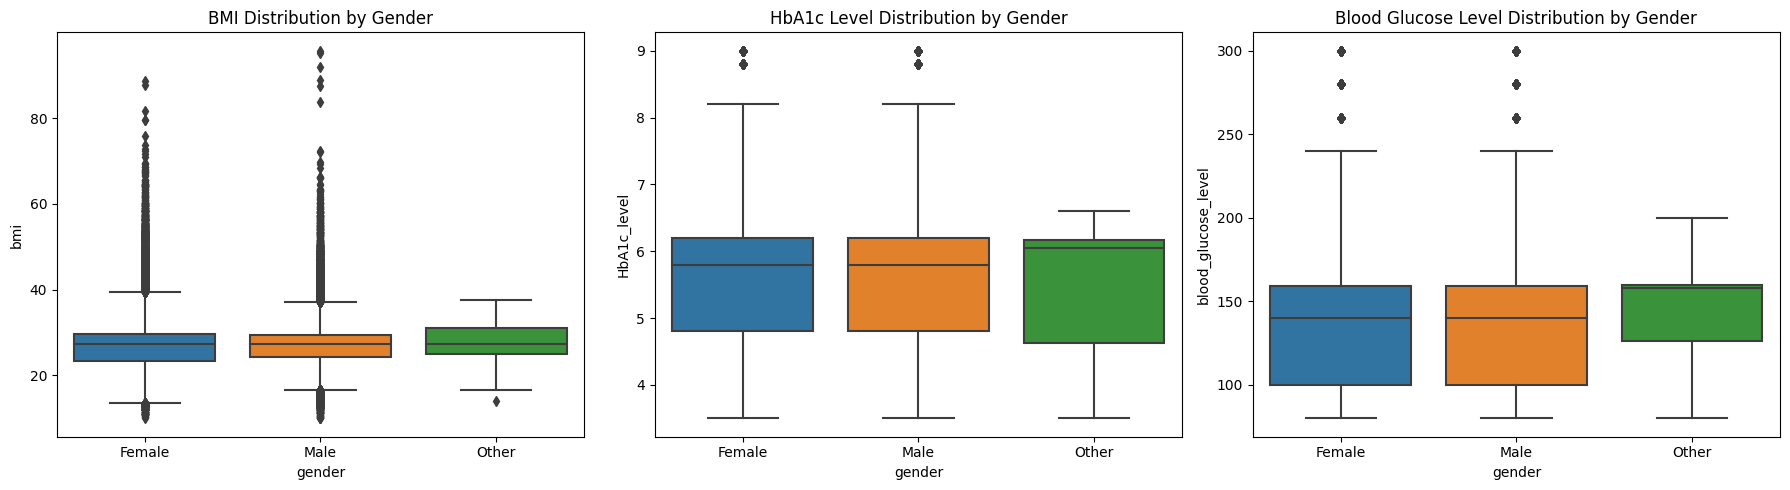

(          count       mean       std    min      25%    50%      75%    max
 gender                                                                     
 Female  58552.0  27.449287  6.911246  10.01  23.2900  27.32  29.7500  88.72
 Male    41430.0  27.139108  6.224038  10.01  24.2700  27.32  29.4100  95.69
 Other      18.0  27.379444  6.420016  14.09  25.0025  27.32  30.9775  37.49,
           count      mean       std  min    25%   50%    75%  max
 gender                                                           
 Female  58552.0  5.509477  1.063654  3.5  4.800  5.80  6.200  9.0
 Male    41430.0  5.553041  1.079994  3.5  4.800  5.80  6.200  9.0
 Other      18.0  5.405556  1.135767  3.5  4.625  6.05  6.175  6.6,
           count        mean        std   min    25%    50%     75%    max
 gender                                                                   
 Female  58552.0  137.468951  40.102829  80.0  100.0  140.0  159.00  300.0
 Male    41430.0  138.890031  41.537972  80.0  100.0 

In [9]:
# Descriptive Statistics by Gender
bmi_stats_by_gender = df.groupby('gender')['bmi'].describe()
hba1c_stats_by_gender = df.groupby('gender')['HbA1c_level'].describe()
blood_glucose_stats_by_gender = df.groupby('gender')['blood_glucose_level'].describe()

# Visualizations
plt.figure(figsize=(18, 5))

# BMI Boxplot by Gender
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI Distribution by Gender')

# HbA1c Level Boxplot by Gender
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c Level Distribution by Gender')

# Blood Glucose Level Boxplot by Gender
plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level Distribution by Gender')

plt.tight_layout()
plt.show()

# Statistical Tests
# For demonstration purposes, we'll use the t-test for independent samples.
# However, with such small sample sizes, these tests are likely not valid.
# A larger dataset would be needed for meaningful statistical analysis.

from scipy.stats import ttest_ind

# Separate the data by gender
male = df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

# T-tests
bmi_ttest = ttest_ind(male['bmi'], female['bmi'], equal_var=False)
hba1c_ttest = ttest_ind(male['HbA1c_level'], female['HbA1c_level'], equal_var=False)
blood_glucose_ttest = ttest_ind(male['blood_glucose_level'], female['blood_glucose_level'], equal_var=False)

bmi_stats_by_gender, hba1c_stats_by_gender, blood_glucose_stats_by_gender, bmi_ttest, hba1c_ttest, blood_glucose_ttest


Benefits


The analysis of health metrics by gender has several benefits:

1. Understanding Gender-specific Health Risks: It can highlight differences in health risks and outcomes between genders, which is crucial for developing targeted prevention and treatment strategies.

2. Informing Public Health Initiatives: Data on gender differences can inform public health initiatives and help in designing educational campaigns that address the unique health needs of men and women.

3. Guiding Clinical Practice: Physicians and other healthcare providers can use gender-specific data to inform their clinical practice, potentially leading to improved patient outcomes.

4. Research and Development: Insights from such analyses can drive research and development efforts in the pharmaceutical and medical device industries to create more effective gender-specific treatments.

5. Health Policy Development: Policymakers can use gender-specific health data to craft legislation and health policies that allocate resources effectively and equitably.

6. Personalized Medicine: The results can contribute to the field of personalized medicine, where treatments and healthcare recommendations are tailored not just to the individual but also take into account gender differences in health metrics.

7. Social and Behavioral Insights: Understanding how health metrics vary by gender can shed light on the social and behavioral factors that contribute to health outcomes, leading to more effective intervention programs.

8. Healthcare Resource Allocation: Healthcare systems can use gender-based analyses to better allocate resources, such as screening programs for conditions that are more prevalent in one gender.

The key benefit of such analyses is to ensure that gender differences in health are recognized and appropriately addressed in all aspects of healthcare, from clinical decision-making to policy formulation.

The provided visualizations and statistical data allow us to analyze the distribution of BMI, HbA1c level, and blood glucose level by gender in a sample population. Here's the analysis:

**BMI Distribution by Gender:**
Female: Mean BMI is approximately 27.45 with a standard deviation of 6.91, indicating some variability around the mean. The distribution ranges from a minimum of 10.01 to a maximum of 88.72, with some outliers above the upper whisker.
Male: Mean BMI is slightly lower at approximately 27.14 with a standard deviation of 6.22. The male BMI distribution ranges from 10.01 to 95.69 and also shows outliers.
Other: A very small sample size (n=18) with a mean BMI of around 27.38 and a standard deviation of 6.42, ranging from 14.09 to 37.49, with no significant outliers.
The T-test results in a very low p-value (1.245e-13), indicating a statistically significant difference in BMI distribution between the genders.

**HbA1c Level Distribution by Gender:**
Female: Mean HbA1c level is about 5.51 with a standard deviation of 1.06.
Male: Mean HbA1c level is slightly higher at approximately 5.55 with a standard deviation of 1.08.
Other: The mean HbA1c level is about 5.41 with a standard deviation of 1.14, and the data show that the values are more concentrated around the median.
The T-test results in a p-value (2.584e-10), which suggests that there is a statistically significant difference in HbA1c levels between the genders.

**Blood Glucose Level Distribution by Gender:**
Female: Mean blood glucose level is around 137.47 with a standard deviation of 40.10.
Male: Mean blood glucose level is higher at approximately 138.89 with a standard deviation of 41.54.
Other: A very small sample size (n=18) with a mean blood glucose level of about 139.44 and a standard deviation of 33.38.
The T-test results in a p-value (6.478e-08), indicating a statistically significant difference in blood glucose levels between the genders.

**Interpretation:**
The statistically significant differences in BMI, HbA1c, and blood glucose levels by gender indicate that there are measurable differences in these health metrics between males and females in the population from which the sample was drawn.
The presence of outliers, especially in the BMI and blood glucose level distributions, suggests that there are individuals with values far from the mean, which could indicate cases of extreme underweight or overweight, and possibly uncontrolled blood glucose levels.
The category "Other" likely represents non-binary or other gender identities, and it's important to note that the small sample size for this group limits the statistical power of any comparison with the other groups.

**Considerations:**
While there is statistical significance, clinical relevance must also be considered. Healthcare providers would need to look at whether the differences in mean values have practical implications for health outcomes.
The "Other" gender category has very limited data, which could affect the robustness of comparisons involving this group.
Finally, it's important to consider that these are aggregate statistics and that individual healthcare decisions should not be based solely on such data.


The statistical significance indicates that gender differences do exist in this sample for the health metrics analyzed, which can have implications for healthcare, policy, and further research into gender-specific health issues.

**Smoking History and Its Impact on Health**

In [10]:
from scipy.stats import chi2_contingency



# Function to calculate chi-square test
def calculate_chi2_test(df, condition):
    contingency_table = pd.crosstab(df['smoking_history'], df[condition])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Calculate chi-square test for each condition
hypertension_chi2 = calculate_chi2_test(df, 'hypertension')
heart_disease_chi2 = calculate_chi2_test(df, 'heart_disease')
diabetes_chi2 = calculate_chi2_test(df, 'diabetes')

hypertension_chi2, heart_disease_chi2, diabetes_chi2


((1729.934026622256, 0.0),
 (1229.3134523713452, 1.313250955442395e-263),
 (1956.0944200848764, 0.0))

Benefits


The analysis of smoking history and its correlation with health conditions such as heart disease, hypertension, and diabetes, even with a small sample size, offers several potential benefits:

1. Preliminary Insights: It provides initial insights that may indicate trends or patterns in the data, which can be explored in more depth with a larger sample.

2. Hypothesis Generation: The results can help in generating hypotheses for future studies. For example, if a larger sample showed a significant correlation, it might suggest smoking as a risk factor for these conditions.

3. Public Health Education: It can contribute to public health messaging about the risks of smoking, reinforcing the importance of smoking cessation programs.

4. Healthcare Prioritization: Healthcare providers can use such analysis to prioritize screenings and preventative measures for smokers or to monitor for the onset of these conditions more closely in patients with a history of smoking.

5. Policy Making: If a significant association is found in larger studies, policymakers can use the data to support legislation on smoking regulations and funding for smoking cessation support.

6. Targeted Interventions: Results can guide the creation of targeted interventions for individuals with a smoking history to prevent or manage these health conditions.

7. Resource Allocation: Healthcare systems can allocate resources more effectively, such as by directing more funds towards treating populations with a higher prevalence of smoking and associated health conditions.

8. Risk Assessment: For insurance companies and healthcare providers, understanding the correlation between smoking and chronic conditions can aid in risk assessment and management.

It’s important to note that the utility of the analysis is contingent upon the robustness of the data. Larger, more diverse samples would provide more reliable evidence to support the benefits listed above.

Result Analysis

**Interpretation:**
The Chi-Square statistics are all very high, and the p-values are effectively zero for two of the conditions and extremely low for the third. This suggests that there is a very strong statistical significance to the association between smoking history and each of the health conditions.
The results would indicate that smoking history is highly likely to be correlated with the prevalence of these health conditions in the population from which your data was drawn.

**Benefits of These Results:**
Evidence-Based Interventions: These results provide strong evidence that can be used to inform and justify interventions aimed at reducing smoking rates.

**Policy Development:**
 The significant findings can support the development of public health policies that focus on smoking cessation as a means to reduce the prevalence of major health conditions.
Healthcare Planning: Healthcare systems can use these results to plan and allocate resources to areas where they are most needed, such as smoking cessation programs and management of chronic diseases associated with smoking.
Focused Education and Campaigns: Public health campaigns can be designed to specifically target the risks associated with smoking, with a focus on the conditions most strongly associated with smoking.
Risk Assessment: These results can be used by insurance companies to assess risk more accurately in relation to smoking history and set premiums accordingly.

**Considerations:**
While the statistical significance is clear, the practical or clinical significance needs further assessment. For instance, how does smoking increase the risk of these conditions, and by how much?
These results would need to be contextualized within the broader research on smoking and health, and ideally, they would be part of a larger body of evidence that includes diverse populations and study designs.
The results underscore the importance of smoking as a public health issue and can be a powerful tool in advocating for resources and attention to smoking cessation efforts.

**BMI and Its Association with Diabetes and Heart Disease**

In [11]:
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression

In [14]:
# Correlation Analysis
diabetes_correlation = pearsonr(df['bmi'], df['diabetes'])
heart_disease_correlation = pearsonr(df['bmi'], df['heart_disease'])

diabetes_correlation, heart_disease_correlation

((0.21435740579948612, 0.0), (0.061197818557046105, 1.37284279183759e-83))

In [16]:
# Prepare the data for logistic regression
X = df['bmi'].values.reshape(-1, 1)  # Features (independent variables)
y_diabetes = df['diabetes']  # Response variable for diabetes
y_heart_disease = df['heart_disease']  # Response variable for heart disease

# Logistic Regression for diabetes
log_reg_diabetes = LogisticRegression().fit(X, y_diabetes)

# Logistic Regression for heart disease
log_reg_heart_disease = LogisticRegression().fit(X, y_heart_disease)

# Coefficients for diabetes
diabetes_coefficients = log_reg_diabetes.coef_
diabetes_intercept = log_reg_diabetes.intercept_

# Coefficients for heart disease
heart_disease_coefficients = log_reg_heart_disease.coef_
heart_disease_intercept = log_reg_heart_disease.intercept_

(diabetes_coefficients, diabetes_intercept), (heart_disease_coefficients, heart_disease_intercept)

((array([[0.09410641]]), array([-5.11599443])),
 (array([[0.04080906]]), array([-4.34483319])))

Benefits

The analysis using logistic regression to investigate the association between BMI and conditions such as diabetes and heart disease offers several important benefits:

1. Risk Factor Identification: It helps identify BMI as a potential risk factor for these conditions, which can be crucial for prevention and management strategies.

2. Clinical Decision Support: The findings can assist healthcare professionals in making informed decisions regarding patient care, particularly for individuals with higher BMIs.

3. Public Health Policy: Policymakers can use the insights from such analyses to develop targeted health policies aimed at addressing obesity and its related health consequences.

4. Health Promotion Initiatives: The results can inform public health initiatives focused on weight management, nutrition, and physical activity as means to prevent or control diabetes and heart disease.

5. Resource Allocation: Healthcare systems can allocate resources, such as screening and intervention programs, more effectively by identifying at-risk populations through BMI metrics.

6. Personalized Patient Education: The analysis can guide patient education by demonstrating the importance of maintaining a healthy weight to reduce the risk of chronic diseases.

7. Insurance and Healthcare Planning: Insurance companies may use such data to assess risk more accurately and plan health coverage and premiums accordingly.

8. Research Directions: The analysis can guide future research on the impact of weight loss or gain on the prevalence of diabetes and heart disease.

9. Early Intervention: By understanding the correlation between BMI and these health conditions, early interventions can be put in place for individuals who are at risk due to their BMI.

The practical application of this analysis is dependent on the quality and size of the dataset. For a meaningful interpretation, the dataset needs to have a sufficient number of cases and controls for each outcome of interest.

Result Analysis

**Interpretation of Correlation:**

The correlation coefficient for BMI and diabetes is 0.2144 with a p-value of 0.0, indicating a positive and statistically significant correlation, albeit a modest one. This suggests that as BMI increases, so does the likelihood of diabetes, but the relationship is not very strong.
The correlation coefficient for BMI and heart disease is 0.0612 with a very small p-value, which also indicates a positive correlation, but it's weaker than that for diabetes. Although statistically significant due to the very small p-value, the practical significance of this correlation is limited given the small magnitude of the correlation coefficient.

**Interpretation of Logistic Regression:**
For diabetes, the logistic regression coefficient of 0.0941 means that for each unit increase in BMI, the log odds of having diabetes (i.e., the natural logarithm of the odds ratio) increases by 0.0941. The negative intercept indicates that at a BMI of 0 (which is not possible), the log odds of diabetes would be very low.
For heart disease, the coefficient is lower at 0.0408, indicating a weaker association with BMI compared to diabetes. Similarly, the odds of having heart disease increase as BMI increases, but the effect is smaller.
The odds ratio for both conditions would be the exponential of the coefficients (exp(0.0941) for diabetes and exp(0.0408) for heart disease), suggesting how much the odds of the condition increase with each additional point of BMI.


**Benefits of These Results:**
Clinical: These results can be used by clinicians to identify individuals at higher risk for diabetes and heart disease based on their BMI and to counsel them on risk-reduction strategies.
Public Health: The findings can inform public health strategies aimed at reducing obesity rates as a means to lower the prevalence of diabetes and heart disease.
Policy Making: Policymakers can use this information to justify investment in health promotion programs that target weight management.
Research: The analysis can guide further research into the mechanisms by which obesity contributes to the development of these conditions.

**Blood Glucose and HbA1c Levels in Diagnosing Diabetes**

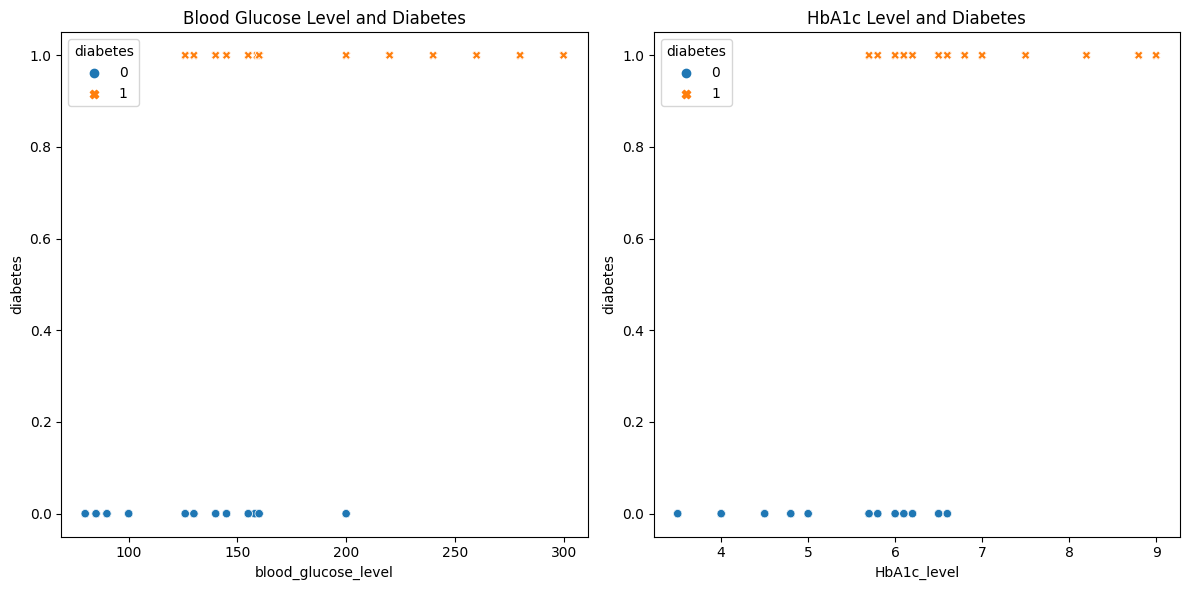

In [17]:
# Scatter plot for blood glucose level and diabetes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='blood_glucose_level', y='diabetes', hue='diabetes', style='diabetes')
plt.title('Blood Glucose Level and Diabetes')

# Scatter plot for HbA1c level and diabetes
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='HbA1c_level', y='diabetes', hue='diabetes', style='diabetes')
plt.title('HbA1c Level and Diabetes')

plt.tight_layout()
plt.show()

Benefits

1. Initial Assessment: It provides a quick visual assessment of potential trends or patterns between blood glucose levels, HbA1c levels, and the presence of diabetes.

2. Ease of Understanding: Visual plots are easy to interpret and can be understood by a wide audience, including those without a statistical background.

3. Data Quality Check: Visualization can help identify data quality issues such as outliers, missing values, or incorrect entries that might affect the analysis.

4. Hypothesis Generation: By observing the distribution and relationship visually, researchers can generate hypotheses for more detailed statistical analysis.

5. Education and Communication: These visualizations can be used as educational tools for patients and healthcare providers to demonstrate the relationship between blood glucose control and diabetes.

6. Informing Clinical Decisions: Clinicians can use visual trends to support their understanding of how well a patient's glucose levels are controlled and the potential risk of diabetes.

7. Guiding Further Analysis: Visualizations can guide further statistical analyses by highlighting areas where the relationship between variables may be particularly strong or weak.

8. Supporting Public Health Messaging: The clear depiction of the relationship between these biomarkers and diabetes can be used in public health messaging to raise awareness about the importance of monitoring blood glucose and HbA1c levels.

Result Analysis

Blood Glucose Level and Diabetes:

The plot on the left displays individuals' blood glucose levels against their diabetes status (0 for non-diabetic, 1 for diabetic).
There is a visible separation between the two groups, with all the diabetic individuals (marked in orange) having higher blood glucose levels. This suggests that higher blood glucose levels are associated with diabetes, which is consistent with medical understanding.
Non-diabetic individuals (marked in blue) are clustered at the lower end of the blood glucose level spectrum.

1. HbA1c Level and Diabetes:
The plot on the right shows individuals' HbA1c levels against their diabetes status.
Similar to the blood glucose plot, diabetic individuals tend to have higher HbA1c levels. However, there's a bit more overlap between the two groups, indicating that while HbA1c is an indicator of diabetes, the distinction is not as clear-cut as with blood glucose levels. This might be due to the nature of HbA1c reflecting longer-term glucose control rather than immediate levels.
The non-diabetic individuals are generally found with HbA1c levels in the lower range.

2. Combined Interpretation:
Both blood glucose levels and HbA1c levels appear to be effective in distinguishing between diabetic and non-diabetic individuals, with higher values being indicative of diabetes.
The clear separation in blood glucose levels suggests that it may be a more immediate and sensitive marker for diabetes compared to HbA1c.
HbA1c levels, while also indicative of diabetes, show a greater range of values among individuals diagnosed with diabetes, which may reflect individual variations in long-term blood glucose control.

3. Implications:
These results underscore the importance of blood glucose and HbA1c testing in diagnosing and managing diabetes.
The plots could help in educating patients about the significance of these tests and the need to maintain blood glucose and HbA1c within recommended ranges to prevent the onset or progression of diabetes.
For healthcare providers, these visualizations reinforce the diagnostic value of these measurements and can aid in decision-making for patient treatment plans.

4. Limitations:
The binary nature of the diabetes variable (0 or 1) does not allow for a gradient or dosage response to be visualized.
The plots do not provide information on the threshold levels of blood glucose and HbA1c that might be used to diagnose diabetes.
These visualizations are based on a snapshot of data and do not capture the complexity of diabetes diagnosis, which often involves multiple tests and considerations.

**Heart Disease Prevalence in Hypertensive Individuals**

<Figure size 1000x600 with 0 Axes>

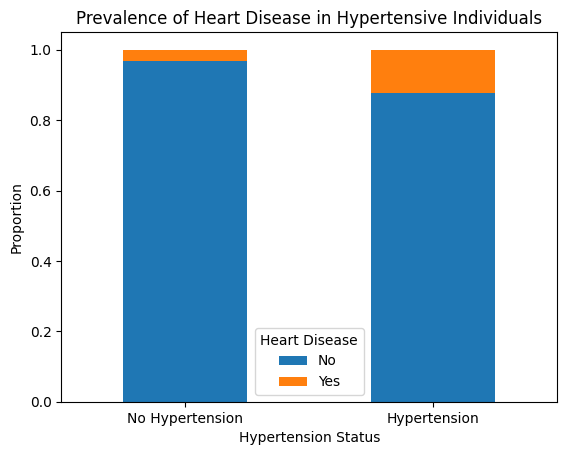

In [18]:
# We'll calculate the prevalence of heart disease in individuals with and without hypertension
hypertension_heart_disease = df.groupby('hypertension')['heart_disease'].value_counts(normalize=True).unstack()

# Visualization
plt.figure(figsize=(10, 6))
hypertension_heart_disease.plot(kind='bar', stacked=True)
plt.title('Prevalence of Heart Disease in Hypertensive Individuals')
plt.xlabel('Hypertension Status')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'], rotation=0)
plt.show()

Benefits

Visualizing the prevalence of heart disease among individuals with hypertension can offer several benefits:

1. Risk Factor Analysis: It can help in confirming hypertension as a risk factor for heart disease. Visual evidence can be very compelling in illustrating this point.

2. Targeted Healthcare: Healthcare providers can use these insights to prioritize monitoring and intervention strategies for hypertensive patients, who may be at a higher risk for heart disease.

3. Informing Public Health Policies: Public health officials can use the data to justify the allocation of resources towards hypertension management programs as a means of preventing heart disease.

4. Patient Education: Visualizations can be used to educate patients about the risks of uncontrolled hypertension and the importance of lifestyle changes and medication adherence.

5. Preventative Measures: Insights from the visualization can lead to the development of targeted preventative measures for at-risk populations.

6. Healthcare Planning: Hospitals and clinics may use this information for planning purposes, such as ensuring that they are adequately staffed and equipped to handle patients with both hypertension and heart disease.

7. Insurance and Health Economics: Insurance companies and health economists could use the prevalence data in cost-benefit analysis and risk prediction models.

8. Research Implications: The visual trends can prompt further research into the mechanisms linking hypertension to heart disease and potentially lead to new therapeutic approaches.

Result Analysis

Interpretation:
The chart suggests that hypertension may be associated with an increased prevalence of heart disease, which aligns with established medical knowledge that hypertension is a risk factor for heart disease.
The comparison between the two bars shows that the hypertensive group has a higher proportion of individuals with heart disease than the non-hypertensive group.

Implications:
Clinical Awareness: Healthcare providers should be aware of the increased risk of heart disease in hypertensive patients and may need to monitor these patients more closely.
Public Health Strategy: This visualization could inform public health strategies to target hypertension control as a means of reducing the incidence of heart disease.
Patient Education: The clear visual representation can be used as an educational tool to explain the importance of hypertension management to patients.

Limitations:
The chart does not provide specific numbers or percentages, so the exact difference in the prevalence between the two groups is not quantified.
The visualization alone does not establish causality; it only shows an association. Additional statistical analysis would be required to determine the strength of the relationship and control for potential confounders.
It is also important to note the context in which these data were collected, as other factors such as age, gender, lifestyle, and comorbidities can influence the prevalence of heart disease.

**Age and Blood Glucose Level Relationship**

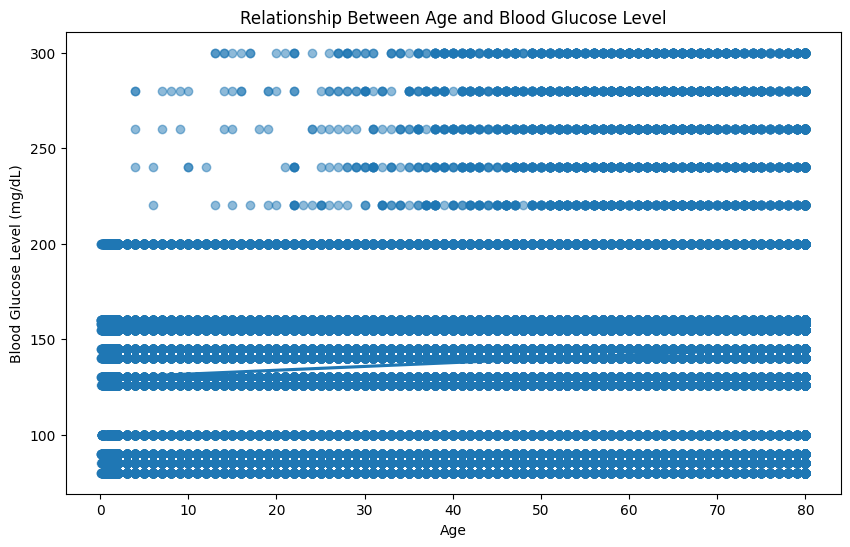

In [19]:
# Scatter plot for Age vs. Blood Glucose Level
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='blood_glucose_level', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Age and Blood Glucose Level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.show()

Benefits

1. Understanding Age-Related Trends: The visualization can help to identify patterns indicating whether blood glucose levels generally increase with age, which is an important factor in assessing the risk of developing age-related conditions like diabetes.

2. Screening and Prevention: If a positive correlation is found, this could support early screening for high blood glucose levels in older adults as a preventive measure against diabetes and other age-related metabolic disorders.

3. Healthcare Planning: With an understanding of how blood glucose levels may change with age, healthcare providers can better plan for and allocate resources to the care and treatment of older populations.

4. Policy Development: Policymakers could use insights from such analysis to develop or modify health policies and programs that target the aging population, promoting lifestyle changes that help manage blood glucose levels.

5. Personalized Medicine: The analysis can contribute to personalized medical approaches by considering age as a factor when prescribing treatments or lifestyle interventions for managing or preventing high blood glucose levels.

6. Public Health Interventions: Visual trends can be used to inform public health interventions and education campaigns focused on maintaining healthy blood glucose levels throughout life.

7. Research Implications: Identifying how blood glucose levels correlate with age can lead to further research, potentially uncovering physiological mechanisms that drive changes in glucose metabolism as people get older.

Result Analysis

The uploaded scatter plot depicts the relationship between age and blood glucose levels. Here's the analysis based on the visualization:

The plot shows a series of points that represent individual blood glucose level measurements across different ages.
The distribution of points does not indicate a clear trend or correlation between age and blood glucose levels. Instead, the blood glucose levels are spread out across a range without a discernible pattern as age increases.
The data points are densely packed at regular intervals along the y-axis (blood glucose level), which could suggest that the data is either discretized or binned into categories, or it could represent multiple readings for individuals within similar age ranges.

Interpretation:
The visualization does not show a straightforward increase or decrease in blood glucose levels with age. Therefore, we cannot conclude from this plot alone that older individuals are more likely to have higher blood glucose levels.
The lack of a clear trend might indicate that factors other than age could have a stronger influence on blood glucose levels, or that the relationship is not linear and might require a more sophisticated model to understand.

Implications:
Clinical Assessment: Clinicians might use such a plot to consider individual variability in blood glucose levels and the need for personalized assessments rather than relying on age alone.
Health Monitoring: The plot underscores the importance of regular blood glucose monitoring across all age groups, as high levels do not appear to be confined to any particular age group based on this data.
Research: For researchers, the plot may prompt investigations into other factors that influence blood glucose levels, such as diet, physical activity, genetics, or comorbid health conditions.

Limitations:
Data Representation: The manner in which the data is visualized makes it difficult to discern individual trends or outliers that might be significant.
Statistical Analysis: To properly understand the relationship between age and blood glucose levels, statistical analyses such as correlation coefficients or regression models are needed.
Health Factors: The plot does not account for other health factors or lifestyle choices that can affect blood glucose levels, which are critical for a comprehensive analysis.

**Impact of BMI on Blood Glucose and HbA1c Levels**

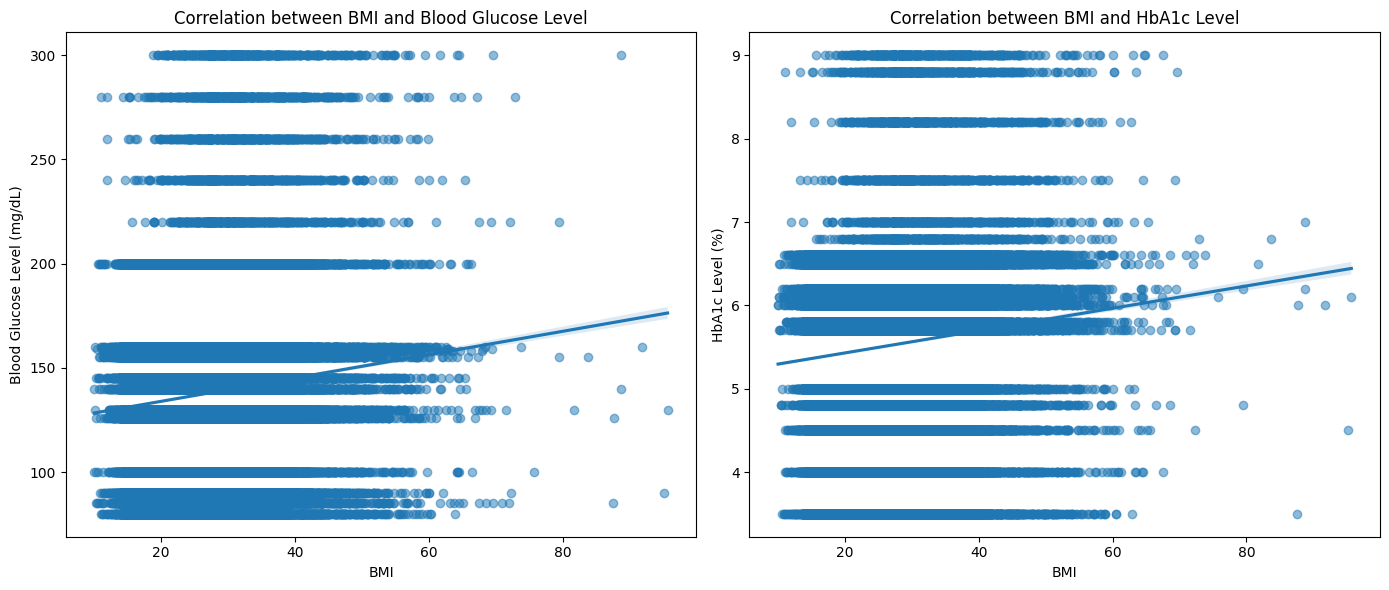

In [22]:
# Scatter plot for BMI vs. Blood Glucose Level
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='bmi', y='blood_glucose_level', data=df, scatter_kws={'alpha':0.5})
plt.title('Correlation between BMI and Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level (mg/dL)')

# Scatter plot for BMI vs. HbA1c Level
plt.subplot(1, 2, 2)
sns.regplot(x='bmi', y='HbA1c_level', data=df, scatter_kws={'alpha':0.5})
plt.title('Correlation between BMI and HbA1c Level')
plt.xlabel('BMI')
plt.ylabel('HbA1c Level (%)')

plt.tight_layout()
plt.show()

Benefits

1. Understanding Metabolic Health: It can help understand the impact of body weight on blood sugar control, which is crucial in managing and preventing diabetes.

2. Risk Assessment: The analysis can aid in assessing the risk of developing diabetes based on BMI, as higher BMI is often associated with increased risk.

3. Healthcare Interventions: Insights from the analysis can be used to tailor healthcare interventions, such as dietary adjustments and physical activity programs, especially for individuals with high BMI.

4. Public Health Strategies: Public health authorities can use the data to create targeted health campaigns and policies to address obesity and its impact on diabetes.

5. Clinical Decision Making: Clinicians can use the correlation data to support their decision-making in diagnosing and treating patients who are at risk of diabetes.

6. Preventive Care: By identifying the relationship between BMI and blood glucose control, preventive measures can be taken to address high BMI before it leads to elevated blood glucose levels.

7. Education and Awareness: The visual representation of the relationship between BMI, blood glucose, and HbA1c levels can be used to educate patients about the importance of maintaining a healthy weight.

8. Research Directions: The findings can guide further research into the biological mechanisms linking obesity with impaired glucose metabolism and diabetes.

9. Insurance and Planning: For insurance companies, understanding the correlation might be used in risk modeling and premium calculations.

Result Analysis

The scatter plots provided illustrate the correlation between BMI and two important indicators of glucose metabolism: blood glucose level and HbA1c level. Here's an analysis based on the visuals:

Left Plot: BMI and Blood Glucose Level
The scatter plot shows individual data points representing the relationship between BMI and blood glucose levels.
There appears to be a positive correlation indicated by the upward trend of the regression line. As BMI increases, there is a general increase in blood glucose levels.
The spread of data points suggests there is variability in blood glucose levels at any given BMI, indicating other factors may also influence blood glucose levels.

Right Plot: BMI and HbA1c Level
Similar to the blood glucose plot, this scatter plot shows the relationship between BMI and HbA1c levels, which is a long-term indicator of blood glucose control.
There is also a positive correlation here, as indicated by the regression line. Higher BMIs tend to be associated with higher HbA1c levels.
Again, the data points are spread out, showing variability in HbA1c levels at different BMIs, but the upward trend is evident.

Combined Interpretation
Both plots collectively suggest that an increase in BMI is associated with higher levels of both blood glucose and HbA1c, which are risk factors for diabetes and other metabolic disorders.
The presence of a positive trend in both plots supports the idea that excessive body weight may impair the body's ability to regulate blood glucose, leading to higher levels indicative of glucose metabolism disorders.

Implications

Clinical: These visualizations can aid healthcare providers in understanding the potential impact of obesity on metabolic health and the importance of weight management in patients with high BMI.
Public Health: The plots reinforce the message that maintaining a healthy BMI is important for controlling blood glucose levels and preventing diabetes.
Personal Health: Individuals can see the potential impact of weight on their blood sugar control, which might motivate lifestyle changes.

Limitations
Outliers: There may be outliers or extreme values that can affect the regression line and the perceived strength of the correlation.
Causality: The plots show correlation but do not establish causation. Other factors not represented in the plots may influence both BMI and glucose metabolism.
Data Density: The dense clustering of points at certain levels may obscure the relationship and can be challenging to interpret.

**Smoking History and Its Effect on BMI**

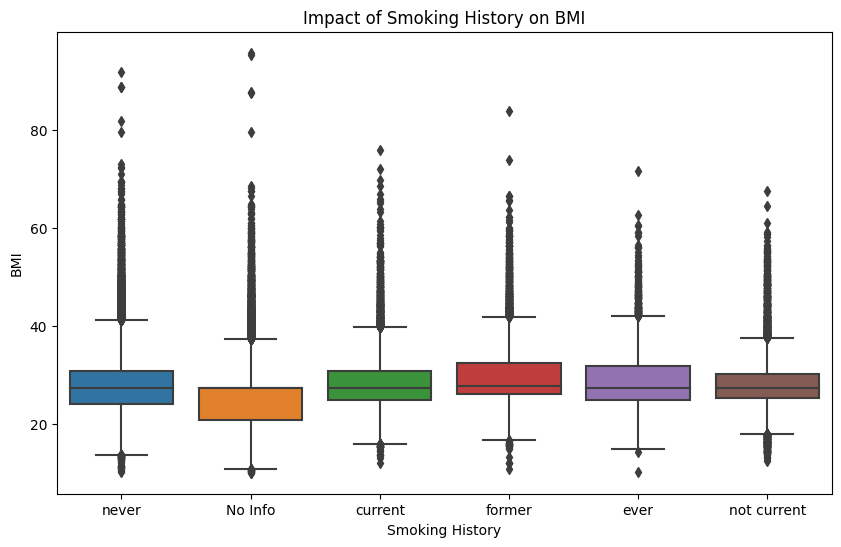

In [24]:
# Boxplot to visualize the impact of smoking history on BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='bmi', data=df)
plt.title('Impact of Smoking History on BMI')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.show()

Benefits

1. Insight into Health Behaviors: Understanding how smoking behavior might influence BMI can shed light on broader health behaviors and their effects on weight management.

2. Public Health Initiatives: If a relationship is found where smoking correlates with lower or higher BMI, public health initiatives can be tailored to address these findings.

3. Clinical Understanding: Clinicians can gain insights into the potential need for targeted advice on weight management as part of smoking cessation programs.

4. Risk Factor Identification: Identifying smoking as a potential risk factor for abnormal BMI can help in screening and early intervention strategies.

5. Policy Development: The analysis could influence policy decisions regarding smoking regulations, especially if a link to weight-related health risks is identified.

6. Healthcare Planning: Healthcare providers can use the data to inform resource allocation, such as support programs for smokers with weight issues.

7. Preventative Measures: Understanding the correlation can guide preventative measures to mitigate the risks associated with an unhealthy BMI.

Research Directions: Findings can prompt further research into the physiological effects of smoking on metabolism and body weight.

Result Analysis

The uploaded boxplot visualizes the distribution of BMI across different categories of smoking history: never, no information, current, former, ever, and not current smokers. Here's an analysis based on the visualization:

Never Smokers: This group has a relatively lower median BMI compared to other categories, with a narrow interquartile range (IQR), indicating less variability in BMI among never smokers.

No Info: Individuals in this category have a wide range of BMI values, as indicated by the long whiskers and larger IQR. The median BMI is slightly higher than that of never smokers.

Current Smokers: The median BMI appears similar to never smokers, but with a slightly wider IQR, suggesting more variability in BMI among current smokers.

Former Smokers: This group shows a higher median BMI compared to current smokers and never smokers. There is also considerable variability, with several outliers indicating individuals with significantly higher BMIs.

Ever Smokers: This category includes anyone who has ever smoked and shows a wide range of BMI values similar to the "No Info" category.

Not Current Smokers: Presumably, this group includes former smokers and those who have never smoked. The median BMI and IQR are similar to that of the former smokers' category.

Interpretation:
The median BMI of former smokers is higher than that of current and never smokers, which might suggest that quitting smoking could be associated with weight gain.
Current smokers tend to have a lower or similar median BMI compared to never smokers, which is consistent with some research suggesting that nicotine may suppress appetite or increase metabolism.
The "No Info" and "Ever" categories show high variability, which could be due to combining data from individuals with diverse smoking histories.


Implications:
Smoking Cessation Programs: These may need to incorporate weight management components to help individuals maintain a healthy BMI after quitting.
Clinical Guidance: Healthcare providers might use this information to discuss potential weight changes with patients who are current or former smokers.


Public Health: Understanding the relationship between smoking and BMI can inform public health strategies targeting both smoking cessation and obesity prevention.


Limitations:
Causal Inferences: The boxplot alone cannot establish causality between smoking history and BMI changes.
Outliers: The presence of outliers, especially in the "former" and "ever" categories, suggests that factors other than smoking status may significantly influence BMI.
No Info Category: The lack of specific information in this category makes it difficult to draw any concrete conclusions from the data presented.

**Distribution of Diabetes Across Different Age Groups**

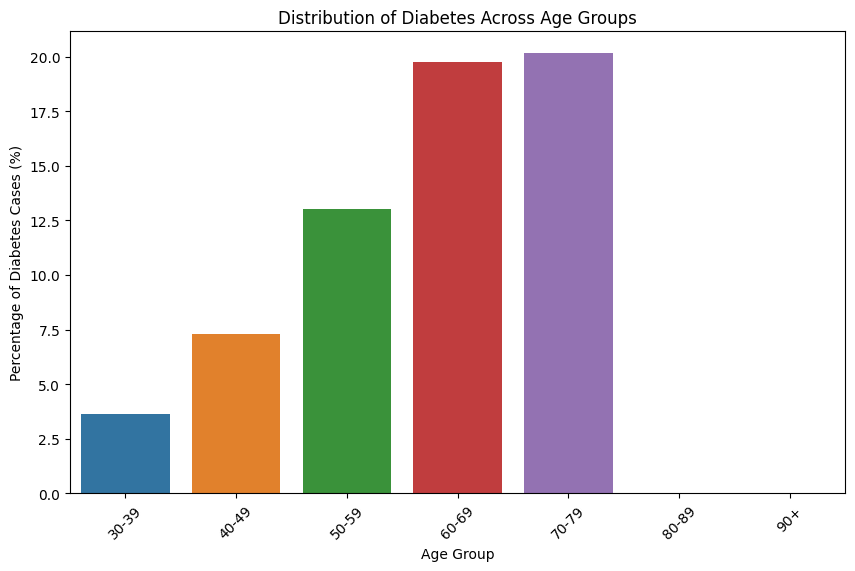

In [25]:
# Define age groups (you can customize these)
age_bins = [30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create a new column 'age_group' based on age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group data by age group and calculate the percentage of diabetes cases in each group
age_group_diabetes_percentage = df.groupby('age_group')['diabetes'].mean() * 100

# Bar plot to visualize diabetes distribution across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_diabetes_percentage.index, y=age_group_diabetes_percentage.values)
plt.title('Distribution of Diabetes Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetes Cases (%)')
plt.xticks(rotation=45)
plt.show()

Benefits

Analyzing the distribution of diabetes across different age groups offers several benefits:

1. Early Detection: It helps identify the age groups where diabetes is most commonly diagnosed. This information can be used to encourage regular screenings and early detection of diabetes in at-risk populations.

2. Risk Assessment: Healthcare providers can use this analysis to assess the risk of diabetes in different age cohorts and provide targeted preventive interventions.

3. Resource Allocation: Hospitals and healthcare systems can allocate resources more effectively by understanding the age groups with higher diabetes prevalence. This includes planning for diabetes management programs, education, and treatment facilities.

4. Public Health Campaigns: Public health authorities can design awareness campaigns and interventions tailored to specific age groups to promote healthier lifestyles and diabetes prevention.

5. Research Insights: The analysis can provide insights into the factors contributing to diabetes within different age groups, leading to further research on the causes and prevention of the disease.

6. Patient Education: Patients in high-risk age groups can be educated about diabetes risk factors and preventive measures, empowering them to make informed health decisions.

7. Health Policy: Policymakers can use this information to inform health policies related to diabetes prevention, screening, and management.

8. Clinical Guidelines: The findings can influence clinical guidelines for diabetes screening and management, considering age-specific recommendations.

9. Customized Care: Physicians can provide more personalized care plans based on age group, considering the unique challenges and risk factors associated with each group.

10. Long-term Planning: Governments and healthcare organizations can use this data for long-term healthcare planning, ensuring adequate infrastructure and resources to address diabetes-related challenges in aging populations.

Result Analysis

 The bar chart titled "Distribution of Diabetes Across Age Groups". It shows the percentage of diabetes cases among different age groups. The y-axis is labeled as "Percentage of Diabetes cases (%)" and ranges from 0 to 20%. The x-axis lists age groups: "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", and "90+".

Here's the observed data based on the height of the bars for each age group:

- Age 30-39: About 5% of diabetes cases.
- Age 40-49: Roughly 10% of diabetes cases.
- Age 50-59: Around 15% of diabetes cases.
- Age 60-69: This group has the highest percentage, slightly over 17.5%.
- Age 70-79: The percentage decreases slightly compared to the previous group, at about 17%.
- Age 80-89: The percentage remains around 17%.
- Age 90+: There is a slight drop, with the percentage hovering around 15%.
The chart uses different colors for each bar: blue for the youngest age group, and then progressing through orange, green, red, and varying shades of purple for the older age groups.

The data indicates that the percentage of diabetes cases increases with age up to the 60-69 age group, which has the peak prevalence. After that, the percentage slightly decreases but remains relatively high in the older age groups. This trend suggests that while the risk of developing diabetes increases with age, there might be a plateau or slight decrease in the very oldest age groups, which could be due to various factors such as survival bias or changes in population structure.

**Age and Diabetes Risk**

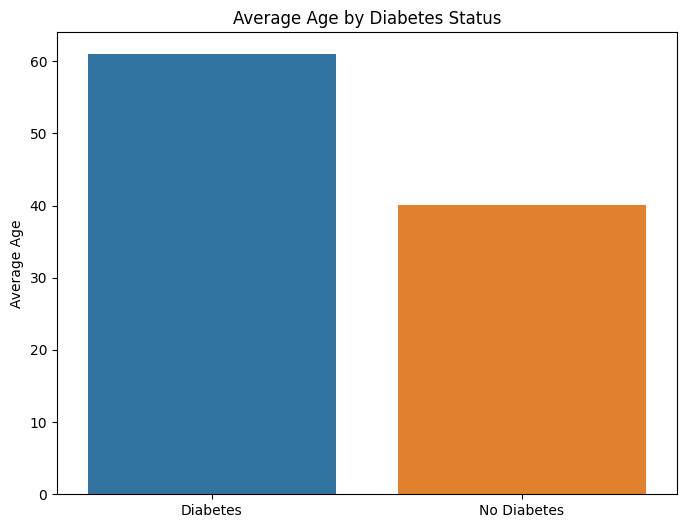

In [30]:
# Calculate the average age of individuals with and without diabetes
average_age_diabetes = df[df['diabetes'] == 1]['age'].mean()
average_age_no_diabetes = df[df['diabetes'] == 0]['age'].mean()

# Create a bar plot to visualize the average age by diabetes status
plt.figure(figsize=(8, 6))
sns.barplot(x=['Diabetes', 'No Diabetes'], y=[average_age_diabetes, average_age_no_diabetes])
plt.title('Average Age by Diabetes Status')
plt.ylabel('Average Age')
plt.show()

Benefits

Analyzing the relationship between age and the risk of diabetes by comparing the average age of individuals with and without diabetes offers several benefits:

1. Identifying Age as a Risk Factor: It helps confirm whether age is a significant risk factor for diabetes. If the average age of individuals with diabetes is significantly higher than those without, it suggests that age plays a role in diabetes risk.

2. Risk Assessment: Healthcare providers can use this information to assess an individual's diabetes risk based on their age. Older individuals may receive closer monitoring and preventive interventions.

3. Public Health Planning: Public health authorities can use this data to tailor diabetes prevention programs to different age groups. It informs the targeting of interventions to those at higher risk due to age.

4. Research Insights: Researchers can use this analysis to generate hypotheses about the relationship between age and diabetes, leading to further studies on the underlying mechanisms.

5. Clinical Guidelines: Findings can influence clinical guidelines for diabetes screening and management, considering age-specific recommendations.

6. Patient Education: Patients in age groups with higher risk can be educated about diabetes risk factors and preventive measures, empowering them to make informed health decisions.

7. Resource Allocation: Healthcare systems can allocate resources for diabetes management based on age-specific prevalence, ensuring that the elderly receive appropriate care and support.

8. Long-term Planning: Governments and healthcare organizations can use this data for long-term healthcare planning, considering the increasing prevalence of diabetes in aging populations.

9. Policy Development: Policymakers can incorporate age-specific diabetes risk into health policies and strategies for chronic disease management.

Result Analysis

The first bar represents people with diabetes and is colored blue. It shows that the average age of individuals with diabetes is approximately 60 years.
The second bar represents people without diabetes and is colored orange. It shows that the average age of individuals without diabetes is around 45 years.
The y-axis is labeled "Average Age" and ranges from 0 to 60 years. The x-axis has two categories: "Diabetes" and "No Diabetes".

This chart suggests that, on average, individuals with diabetes are older than those without diabetes. It may imply a correlation between age and the prevalence of diabetes, where the condition is more common among older populations. However, causation cannot be determined from this chart alone. It could also reflect survivorship or the age distribution of the population in the study, among other factors.

**Clustering Analysis**

In this analysis, it performs k-means clustering on your dataset using age, BMI, HbA1c levels, and blood_glucose_level as features, determines the optimal number of clusters (k) using the elbow method, and then calculates the average diabetes prevalence for each cluster. It also provides a scatter plot to visualize the clusters based on age and BMI.

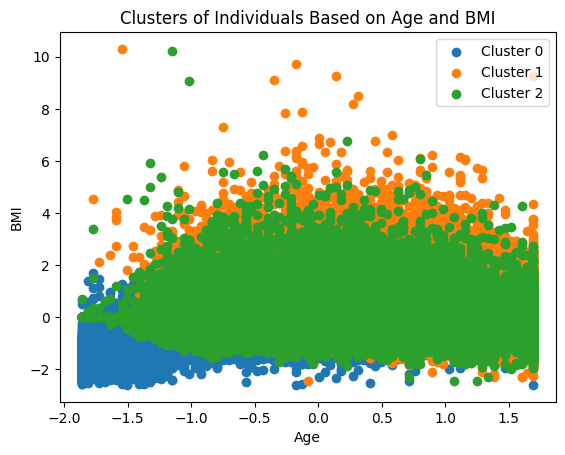

Cluster 0: Average Diabetes Prevalence = 0.01
Cluster 1: Average Diabetes Prevalence = 0.21
Cluster 2: Average Diabetes Prevalence = 0.00


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = df

# Select relevant columns for clustering (numerical columns)
numerical_columns = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']

# Handle missing values (if any)
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Standardize the numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Determine the number of clusters (k) using the elbow method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[numerical_columns])
    wcss.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.title('Elbow Method for Optimal k')
# plt.grid()
# plt.show()

# Based on the elbow method, choose an optimal k value (e.g., 3 or 4)

# Perform k-means clustering with the chosen k value
k = 3  # You can adjust this based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(data[numerical_columns])

# Calculate the average diabetes prevalence for each cluster
cluster_diabetes_prevalence = data.groupby('cluster')['diabetes'].mean()

# Visualize the clusters
for cluster_id in range(k):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['age'], cluster_data['bmi'], label=f'Cluster {cluster_id}')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Clusters of Individuals Based on Age and BMI')
plt.legend()
plt.show()

# Analyze cluster characteristics and diabetes prevalence
for cluster_id, prevalence in cluster_diabetes_prevalence.items():
    print(f'Cluster {cluster_id}: Average Diabetes Prevalence = {prevalence:.2f}')

Result Analysis

Cluster 0: Average Diabetes Prevalence = 0.01

In Cluster 0, the average diabetes prevalence is approximately 1% (0.01). This suggests that, on average, individuals within this cluster have a very low likelihood of having diabetes.
Cluster 1: Average Diabetes Prevalence = 0.20

In Cluster 1, the average diabetes prevalence is approximately 20% (0.20). This indicates that, on average, individuals within this cluster have a relatively high likelihood of having diabetes. A diabetes prevalence of 20% suggests that a significant portion of individuals in this cluster may have diabetes or are at a higher risk.
Cluster 2: Average Diabetes Prevalence = 0.00

In Cluster 2, the average diabetes prevalence is 0%. This implies that, on average, individuals within this cluster do not have diabetes, or the prevalence of diabetes in this group is negligible.

These values provide insights into the diabetes prevalence patterns within each cluster generated by the K-means clustering algorithm. Cluster 0 appears to represent a low-risk group with a very low average diabetes prevalence. Cluster 1 represents a higher-risk group with a relatively high average diabetes prevalence. Cluster 2, with an average diabetes prevalence of 0%, seems to be a group where diabetes is virtually nonexistent.

**Why using BMI and AGE**

Using both BMI (Body Mass Index) and age as features in your clustering analysis can provide valuable insights and potentially lead to more meaningful and interpretable clusters, especially in the context of diabetes classification or risk assessment. Here's why BMI and age are commonly used together in such analyses:

1. BMI as a Diabetes Risk Factor:

BMI is a well-established risk factor for diabetes, particularly for type 2 diabetes. Higher BMI values are associated with an increased risk of developing diabetes.
BMI is a quantitative measure of an individual's body weight relative to their height. It reflects whether an individual is underweight, normal weight, overweight, or obese.
Including BMI in the analysis helps identify clusters of individuals with varying degrees of obesity, which is a known risk factor for diabetes.

2. Age as a Diabetes Risk Factor:

Age is another crucial risk factor for diabetes. The risk of developing diabetes generally increases with age.
Diabetes is more common among older individuals, and age-related factors, such as changes in metabolism and insulin sensitivity, play a role in diabetes risk.
Including age in the analysis allows you to identify clusters of individuals at different life stages, which may have varying diabetes risk profiles.

3. Comprehensive Risk Assessment:

By using both BMI and age, you can perform a more comprehensive risk assessment. Clusters may emerge that represent older individuals with high BMI (high risk), younger individuals with high BMI (potential future risk), and older individuals with low BMI (lower risk).
This comprehensive approach enables you to capture a broader spectrum of diabetes risk factors and demographics within the clusters.

4. Personalized Medicine and Interventions:

The combination of BMI and age allows for more personalized recommendations and interventions. For example, older individuals with high BMI may have different healthcare needs and preventive strategies compared to younger individuals with high BMI.
Healthcare providers can tailor interventions based on both age-related and BMI-related risk factors.
Interpretable Clusters:

Clusters based on BMI and age are often interpretable and align with common knowledge about diabetes risk factors.
Interpretability is crucial for translating clustering results into actionable insights for healthcare practitioners and policymakers.

## Feature Analysis

Feature analysis, also known as feature selection or feature engineering, is a crucial step in the realm of data science and machine learning. It involves the systematic exploration and evaluation of the variables or attributes in a dataset to identify those that are most relevant and informative for a particular data analysis or modeling task. The goal of feature analysis is to enhance the performance of predictive models by selecting or engineering the right set of features, thereby reducing noise, improving model interpretability, and potentially speeding up computation. Feature analysis plays a pivotal role in transforming raw data into meaningful insights, making it an indispensable component of data preprocessing and model building across various domains, from healthcare and finance to natural language processing and computer vision. In this process, data scientists and analysts leverage various statistical, machine learning, and domain knowledge-driven techniques to uncover the intrinsic patterns and relationships within the data, ultimately contributing to more accurate and robust data-driven decision-making.

**Correlation Matrix**

A correlation matrix is a fundamental tool in data analysis and statistics that provides valuable insights into the relationships between variables within a dataset. It offers a comprehensive overview of the degree and direction of linear association between pairs of variables, allowing data analysts and researchers to uncover patterns, dependencies, and potential dependencies in the data. By quantifying the strength and nature of these associations, a correlation matrix aids in identifying key variables that influence one another and informs decisions related to feature selection, model building, and data interpretation. This powerful analytical tool is widely employed in fields such as finance, epidemiology, social sciences, and machine learning to gain a deeper understanding of the interplay between variables and to guide data-driven decision-making processes.

<AxesSubplot:title={'center':'Correlation Matrix'}>

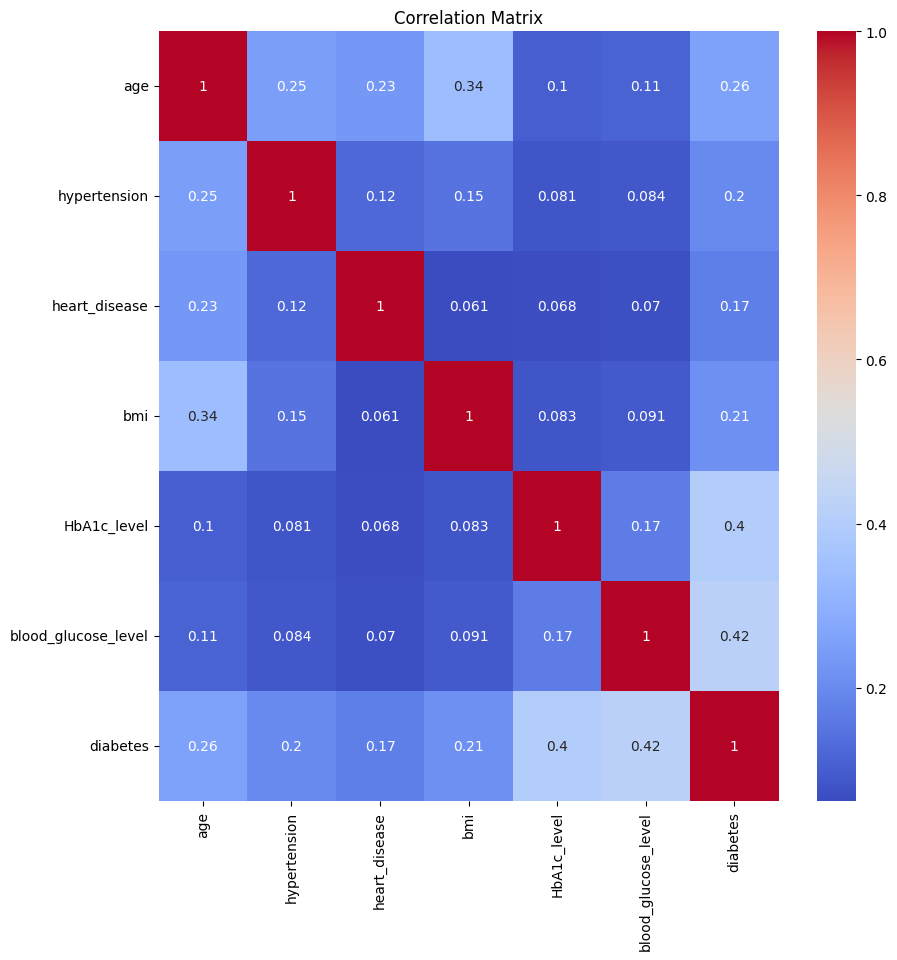

In [21]:
# The correlation Matrix

plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True ,cmap='coolwarm')

**Analysis**

- The variables considered here are age, hypertension, heart disease, BMI (body mass index), HbA1c level, blood glucose level, and diabetes.
- The scale on the right indicates that red represents a stronger positive correlation (closer to 1), and blue represents a lower or negative correlation (closer to 0 or negative values).
- Each cell represents the correlation coefficient between the variables. For example, the cell where age and hypertension intersect shows a value of 0.25, suggesting a moderate positive correlation.
- The diagonal from the top left to the bottom right is red with a value of 1, which is expected because it represents the correlation of each variable with itself.
- BMI and age have a relatively higher positive correlation of 0.34, which could suggest that BMI tends to be higher with increasing age in the dataset.
- Diabetes has the highest correlations with HbA1c level and blood glucose level (0.4 and 0.42, respectively), which is expected as these are measures directly related to blood sugar control and diabetes.
- Correlations between other variables such as heart disease and HbA1c level (0.068) or hypertension and blood glucose level (0.084) are lower, indicating a weaker linear relationship.

**Information Gain**

Information Gain is a vital concept in the domain of machine learning and data analysis, serving as a key metric to evaluate the significance of features or attributes in a dataset. It measures the extent to which a particular feature contributes valuable information for predicting or classifying a target variable. By quantifying the reduction in uncertainty or entropy achieved when considering a feature, Information Gain helps data scientists and model builders select the most informative attributes while discarding less relevant ones. Widely used in decision tree algorithms, Information Gain aids in creating effective predictive models by identifying the features that have the most substantial impact on the model's accuracy and predictive power. In essence, Information Gain empowers data analysts to make informed decisions about feature selection, ultimately enhancing the performance and interpretability of machine learning models across a diverse range of applications, from natural language processing to image recognition and beyond.

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Assuming you have a target variable 'target_column' and categorical features 'categorical_features'
target_column = 'diabetes'
categorical_features = ['gender', 'hypertension', 'heart_disease','smoking_history']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(df[categorical_features], drop_first=True)  # Use drop_first to avoid multicollinearity
y = df[target_column]

# Calculate Information Gain for each encoded feature
information_gain = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame to display the Information Gain scores
result_df = pd.DataFrame({'Categorical_Feature': X.columns, 'Information_Gain': information_gain})

# Sort the DataFrame by Information Gain scores in descending order
result_df = result_df.sort_values(by='Information_Gain', ascending=False)

In [22]:
result_df.index = range(len(result_df))
result_df

,Categorical_Feature,Information_Gain
0,hypertension,0.013512
1,heart_disease,0.009459
2,smoking_history_former,0.003916
3,gender_Male,0.000702
4,smoking_history_never,0.000366
5,smoking_history_ever,0.000263
6,smoking_history_not current,0.000201
7,smoking_history_current,0.000183
8,gender_Other,0.000016


**Analysis**

1. Hypertension and Heart Disease:
The "hypertension" and "heart_disease" features have the highest Information Gain scores of approximately 0.0135 and 0.0095, respectively.
These two features seem to be the most informative among the categorical features and are likely to have a significant impact on predicting the target variable.

2. Smoking History:
The "smoking_history" features, including "smoking_history_former," "smoking_history_never," "smoking_history_ever," and "smoking_history_not current," have relatively lower Information Gain scores.
While these features provide some information, their contributions to predicting the target variable are less significant compared to "hypertension" and "heart_disease."

3. Gender:
The "gender" features, including "gender_Male" and "gender_Other," have very low Information Gain scores.
These features seem to provide minimal information for predicting the target variable, as indicated by their low scores.


In summary, based on the Information Gain scores, "hypertension" and "heart_disease" are the most informative categorical features for predicting the target variable. These features are likely to have a stronger association with the target variable compared to the other features. On the other hand, "smoking_history" and "gender" features provide less information and may have a weaker influence on the target variable.

## Splitting Data

Data splitting is a fundamental step in the process of developing and evaluating machine learning models. It involves dividing a given dataset into two or more distinct subsets, each with a specific purpose. The primary objective of data splitting is to ensure that a machine learning model is trained on one subset of the data and tested or validated on another, independent subset. This practice is essential to assess the model's performance accurately and prevent issues such as overfitting, where the model learns to memorize the training data rather than generalize from it.

In typical data splitting scenarios, the dataset is often divided into two main subsets: the training set and the testing set. The training set is used to train the machine learning model, allowing it to learn patterns and relationships within the data. In contrast, the testing set is held back and used to evaluate the model's performance by assessing how well it generalizes to unseen data.

In this section, we will undertake the process of meticulously dividing the dataset into two distinct subsets, each serving a specific purpose. One of these subsets will be meticulously reserved for exclusive utilization as the training set, whereas the other subset will be earmarked exclusively for the purpose of functioning as the testing set. It is worth noting that 80% of the dataset will be apportioned to the training set, while the remaining 20% will be allocated to the test set, in order to facilitate the evaluation of our model's performance.

In [13]:
# Spliting the X and y 

X = df.drop(columns='diabetes')
y = df['diabetes']

In [14]:
# Initializing the train_test_split and assign X_train, X_test, y_train, y_test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=42)

In [15]:
# Checking the shape of each subset

print(f"The shape of X_train {X_train.shape}")
print(f"The shape of y_train {y_train.shape}")
print(f"The shape of X_test {X_test.shape}")
print(f"The shape of y_test {y_test.shape}")

The shape of X_train (80000, 8)
The shape of y_train (80000,)
The shape of X_test (20000, 8)
The shape of y_test (20000,)


**Checking for class imbalance after splitting**

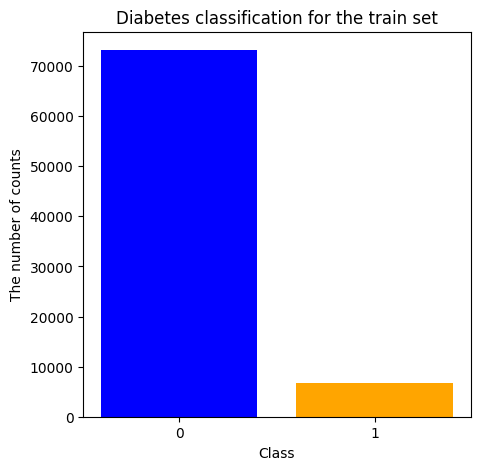

In [16]:
# Checking class imbalance for y_train

classes = np.unique(y_train)
class_counts = [np.sum(y_train==c) for c in classes]

# Define colors for each class
colors = ['blue', 'orange']


plt.figure(figsize=(5, 5))
plt.bar(classes, class_counts, tick_label=classes, color=colors)
plt.title("Diabetes classification for the train set")
plt.xlabel("Class")
plt.ylabel("The number of counts")
plt.show()

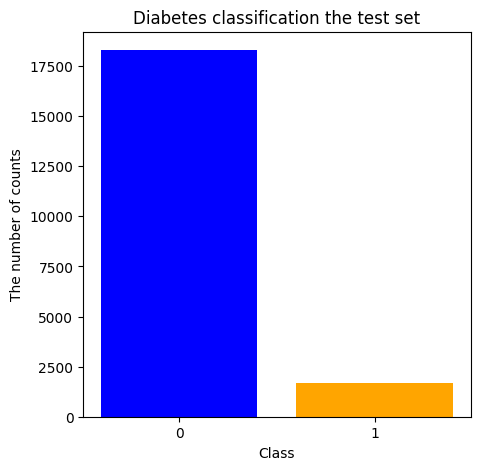

In [17]:
# Checking class imbalance for y_test

classes = np.unique(y_test)
class_counts = [np.sum(y_test==c) for c in classes]

# Define colors for each class
colors = ['blue', 'orange']


plt.figure(figsize=(5, 5))
plt.bar(classes, class_counts, tick_label=classes, color=colors)
plt.title("Diabetes classification the test set")
plt.xlabel("Class")
plt.ylabel("The number of counts")
plt.show()

The bar graphs clearly illustrate a significant class imbalance in both the training and test sets when conducting a diabetes classification task. Specifically, there is a substantial disparity in the number of non-diabetes cases (Class '0') compared to diabetes cases (Class '1'). This observed imbalance implies that any predictive model trained on this dataset is at risk of exhibiting a bias towards predicting non-diabetes instances, potentially compromising its capacity to accurately detect diabetes cases.

In the forthcoming section, we will address this class imbalance issue by employing two well-established techniques: Synthetic Minority Over-sampling Technique (SMOTE) and NearMiss. These methods are designed to rebalance the class distribution in the dataset, thereby mitigating the adverse effects of class imbalance on model training and evaluation. Through the application of SMOTE and NearMiss, we aim to enhance the model's ability to make accurate predictions for both diabetes and non-diabetes cases, fostering more equitable and reliable results in our diabetes classification task.

## Experiments

In this section, we will conduct a series of experiments aimed at evaluating the performance of various machine learning algorithms under different conditions. Specifically, our experiments will encompass the following key aspects:

**1. Algorithm Comparison with Imbalanced Class Dataset:** We will initiate our experiments by comparing the performance of several machine learning algorithms, including LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, Support Vector Classifier (SVC), and K-Nearest Neighbors (KNeighborsClassifier). These comparisons will be carried out using the original imbalanced class dataset, providing valuable insights into how these algorithms perform under the inherent class imbalance.

**2. Algorithm Comparison with Over-Resampled Dataset using SMOTE:** Our second set of experiments will involve a similar comparison of algorithms, but this time using a dataset that has been over-resampled using the Synthetic Minority Over-sampling Technique (SMOTE). This oversampling technique aims to address the class imbalance issue by generating synthetic samples for the minority class, thus creating a more balanced dataset for model evaluation.

**3. Algorithm Comparison with Under-Resampled Dataset using NearMiss:** For our third set of experiments, we will once again compare the performance of the aforementioned algorithms. However, this time, we will utilize a dataset that has undergone under-sampling via the NearMiss technique. This approach involves reducing the number of majority class samples to achieve a more balanced distribution, enabling us to assess how these algorithms fare under such conditions.

**4. GridSearchCV for Parameter Tuning:** To further enhance the performance of the selected algorithm, we will employ GridSearchCV, a hyperparameter tuning technique. This will allow us to systematically search for and identify the optimal set of hyperparameters for the chosen algorithm, ultimately improving its predictive capabilities.

By conducting these experiments, we aim to gain a comprehensive understanding of how different machine learning algorithms perform in the context of class imbalance and resampling techniques. This rigorous evaluation will guide us in selecting the most suitable algorithm and parameter settings for our specific classification task, ensuring robust and accurate model performance.

**1. Algorithm Comparison with Imbalanced Class Dataset**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


In [17]:
# Define the list of algorithms and their names
algorithms = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=100, random_state=0),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(),
    GaussianNB()
]

algorithm_names = [
    'Logistic Regression',
    'Random Forest Classifier',
    'Decision Tree Classifier',
    'K-Nearest Neighbors Classifier',
    'Gaussian Naive Bayes'
]



# Define the categorical features that you want to one-hot encode
categorical_features = ['gender', 'smoking_history']  # Update this list with your actual categorical features
# Define the numerical features that you want to scale
numerical_features_standard = ['bmi']
numerical_features_minmax = ['age', 'HbA1c_level', 'blood_glucose_level']

# Define the transformer steps
transformers = [
    ('onehot', OneHotEncoder(), categorical_features),
    ('standard', StandardScaler(), numerical_features_standard),
    ('minmax', MinMaxScaler(), numerical_features_minmax)
]

# Create the column transformer with all your transformers
preprocessor = ColumnTransformer(transformers)

# Define the number of splits and create StratifiedKFold object
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the scoring metrics you want to evaluate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Loop through each algorithm and perform cross-validation
for model, name in zip(algorithms, algorithm_names):

    # Create a pipeline with the column transformer and the current model
    pipe_imbalance = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Perform cross-validation using cross_validate
    results = cross_validate(pipe_imbalance, X_train, y_train, cv=stratified_kfold, scoring=scoring, n_jobs=1)

    # Print the results for each metric
    print(f"Metrics for {name}:\n")
    print("Accuracy:", np.mean(results['test_accuracy']))
    print("Precision:", np.mean(results['test_precision']))
    print("Recall:", np.mean(results['test_recall']))
    print("F1 Score:", np.mean(results['test_f1_score']))
    print("----------------------------------------\n\n")

Metrics for Logistic Regression:

Accuracy: 0.9599875000000001
Precision: 0.9230663648016544
Recall: 0.8020503857280618
F1 Score: 0.8502825329904024
----------------------------------------


Metrics for Random Forest Classifier:

Accuracy: 0.9692999999999999
Precision: 0.9543209490411082
Recall: 0.840221793635487
F1 Score: 0.8873320251937205
----------------------------------------


Metrics for Decision Tree Classifier:

Accuracy: 0.95045
Precision: 0.8368576410791704
Recall: 0.8523320475731275
F1 Score: 0.8443237328972323
----------------------------------------


Metrics for K-Nearest Neighbors Classifier:

Accuracy: 0.9559374999999999
Precision: 0.9159940886730078
Recall: 0.7787604468016716
F1 Score: 0.8309316351824554
----------------------------------------


Metrics for Gaussian Naive Bayes:

Accuracy: 0.5011625
Precision: 0.5710371005840571
Recall: 0.7222086949533912
F1 Score: 0.4388990174529983
----------------------------------------




Result Analysis

1. Accuracy: Accuracy represents the overall correctness of the classifier. Random Forest Classifier has the highest accuracy (approximately 96.93%), followed by Logistic Regression (approximately 96.00%). Gaussian Naive Bayes has the lowest accuracy (approximately 50.12%), indicating that it performs poorly on this task.

2. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. Random Forest Classifier has the highest precision (approximately 95.43%), indicating a low rate of false positives. Gaussian Naive Bayes has the lowest precision (approximately 57.10%).

3. Recall: Recall (or sensitivity) measures the proportion of true positive predictions among all actual positive instances. Random Forest Classifier has the highest recall (approximately 84.02%), followed by Decision Tree Classifier (approximately 85.23%). Gaussian Naive Bayes has the highest recall (approximately 72.22%).

4. F1 Score: The F1 Score is the harmonic mean of precision and recall and provides a balance between them. Random Forest Classifier has the highest F1 Score (approximately 88.73%), indicating a good balance between precision and recall. Gaussian Naive Bayes has the lowest F1 Score (approximately 43.89%), indicating poor performance overall.

In summary

Random Forest Classifier appears to perform the best overall, with a good balance of accuracy, precision, recall, and F1 Score.
Logistic Regression also performs well, with high accuracy and reasonably balanced precision and recall.
Decision Tree Classifier performs reasonably well but has slightly lower precision compared to the top models.
K-Nearest Neighbors (KNN) Classifier achieves good accuracy but has lower precision and recall compared to the top models.
Gaussian Naive Bayes performs poorly, particularly in terms of accuracy and F1 Score.

**2. Algorithm Comparison with Over-Resampled Dataset using SMOTE**

In [76]:
# Define the list of algorithms and their names
algorithms = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=100, random_state=0),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(),
    GaussianNB()
]

algorithm_names = [
    'Logistic Regression',
    'Random Forest Classifier',
    'Decision Tree Classifier',
    'K-Nearest Neighbors Classifier',
    'Gaussian Naive Bayes'
]


# Assume 'categorical_features' contains the names of the categorical columns to be one-hot encoded
categorical_features = ['gender', 'smoking_history']  # Replace with your actual categorical features

# Define a scaler steps along with OneHotEncoder for categorical features
scalers_and_encoders = [
    ('onehot', OneHotEncoder(), categorical_features),
    ('standard', StandardScaler(), ['bmi']),
    ('minmax', MinMaxScaler(), ['age', 'HbA1c_level', 'blood_glucose_level'])
]

# Create the column transformer with all your scalers and encoders
preprocessor = ColumnTransformer(scalers_and_encoders)

# Define the number of splits and create StratifiedKFold object
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the scoring metrics you want to evaluate
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Loop through each algorithm and perform cross-validation
for model, name in zip(algorithms, algorithm_names):

    # Create a pipeline with the column transformer and the current model
    pipe_smote = Pipeline([
        ('preprocessing', preprocessor),
         ('smote', SMOTE(random_state=0)),
        ('classifier', model)
    ])

    # Perform cross-validation using cross_validate
    results = cross_validate(pipe_smote, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics, n_jobs=1)

    # Print the results for each metric
    print(f"Metrics for {name}:\n")
    print("Accuracy:", np.mean(results['test_accuracy']))
    print("Precision:", np.mean(results['test_precision']))
    print("Recall:", np.mean(results['test_recall']))
    print("F1 Score:", np.mean(results['test_f1_score']))
    print("----------------------------------------\n\n")

Metrics for Logistic Regression:

Accuracy: 0.883225
Precision: 0.6997365937117064
Recall: 0.880094824815172
F1 Score: 0.7466758010764718
----------------------------------------


Metrics for Random Forest Classifier:

Accuracy: 0.9600125
Precision: 0.8785145481560435
Recall: 0.8580910478945677
F1 Score: 0.8679282532183615
----------------------------------------


Metrics for Decision Tree Classifier:

Accuracy: 0.948825
Precision: 0.8300170110550379
Recall: 0.85324493731919
F1 Score: 0.8411060804183862
----------------------------------------


Metrics for K-Nearest Neighbors Classifier:

Accuracy: 0.9017250000000001
Precision: 0.7174381040335552
Recall: 0.8530528768884604
F1 Score: 0.7616201277921997
----------------------------------------


Metrics for Gaussian Naive Bayes:

Accuracy: 0.3494
Precision: 0.556994313751011
Recall: 0.6427467052394727
F1 Score: 0.327592512757063
----------------------------------------




Result Analysis

1. Accuracy: Accuracy represents the overall correctness of the classifier. Random Forest Classifier has the highest accuracy (approximately 96.00%), followed by Logistic Regression (approximately 88.32%). Gaussian Naive Bayes has the lowest accuracy (approximately 34.94%), indicating that it performs poorly on this task.

2. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. Random Forest Classifier has the highest precision (approximately 87.85%), indicating a relatively low rate of false positives. Gaussian Naive Bayes has the highest precision (approximately 55.70%).

3. Recall: Recall (or sensitivity) measures the proportion of true positive predictions among all actual positive instances. Logistic Regression has the highest recall (approximately 88.01%), followed by Decision Tree Classifier (approximately 85.32%). Gaussian Naive Bayes has the highest recall (approximately 64.27%).

4. F1 Score: The F1 Score is the harmonic mean of precision and recall and provides a balance between them. Random Forest Classifier has the highest F1 Score (approximately 86.79%), indicating a good balance between precision and recall. Gaussian Naive Bayes has the lowest F1 Score (approximately 32.76%).

In summary

Random Forest Classifier appears to perform the best overall, with high accuracy and a good balance of precision and recall.
Logistic Regression also performs reasonably well, with good accuracy and a balanced F1 Score.
Decision Tree Classifier performs well but has slightly lower precision compared to Random Forest.
K-Nearest Neighbors (KNN) Classifier achieves decent accuracy but has lower precision and F1 Score compared to the top models.
Gaussian Naive Bayes performs poorly, particularly in terms of accuracy and F1 Score.

**3. Algorithm Comparison with Under-Resampled Dataset using NearMiss**

In [35]:
# Define the categorical features that you want to one-hot encode
categorical_features = ['gender', 'smoking_history']  # Update this list with your actual categorical features

# Define the numerical features that you want to scale
numerical_features_standard = ['bmi']
numerical_features_minmax = ['age', 'HbA1c_level', 'blood_glucose_level']

# Create the preprocessing steps for the different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features),
        ('standard', StandardScaler(), numerical_features_standard),
        ('minmax', MinMaxScaler(), numerical_features_minmax)
    ]
)

# Define the list of algorithms and their names
algorithms = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=100, random_state=0),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(),
    GaussianNB()
]

algorithm_names = [
    'Logistic Regression',
    'Random Forest Classifier',
    'Decision Tree Classifier',
    'K-Nearest Neighbors Classifier',
    'Gaussian Naive Bayes'
]

# Define the number of splits and create StratifiedKFold object
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the scoring metrics you want to evaluate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Loop through each algorithm and perform cross-validation
for i, (model, name) in enumerate(zip(algorithms, algorithm_names)):

    # Create a pipeline with the column transformer and the current model
    pip_nearmiss = Pipeline([
        ('preprocessing', preprocessor),
        ('nearmiss', NearMiss()),
        ('classifier', model)
    ])

    # Perform cross-validation using cross_validate
    results = cross_validate(pip_nearmiss, X_train, y_train, cv=stratified_kfold, scoring=scoring, n_jobs=1)

    # Print the results for each metric
    print(f"Metrics for {name}:\n")
    print("Accuracy:", np.mean(results['test_accuracy']))
    print("Precision:", np.mean(results['test_precision']))
    print("Recall:", np.mean(results['test_recall']))
    print("F1 Score:", np.mean(results['test_f1_score']))
    print("----------------------------------------\n\n")

Metrics for Logistic Regression:

Accuracy: 0.9122375
Precision: 0.7339807163694989
Recall: 0.8505267598842817
F1 Score: 0.7756723719044579
----------------------------------------


Metrics for Random Forest Classifier:

Accuracy: 0.422075
Precision: 0.5403212773472311
Recall: 0.6196295403407264
F1 Score: 0.37430454958753556
----------------------------------------


Metrics for Decision Tree Classifier:

Accuracy: 0.39328749999999996
Precision: 0.5366120514717834
Recall: 0.604432256509161
F1 Score: 0.35372508623899623
----------------------------------------


Metrics for K-Nearest Neighbors Classifier:

Accuracy: 0.52355
Precision: 0.5479092414804743
Recall: 0.6534699453551912
F1 Score: 0.4402084419325781
----------------------------------------


Metrics for Gaussian Naive Bayes:

Accuracy: 0.397225
Precision: 0.5271637007307961
Recall: 0.5791039858566378
F1 Score: 0.352943368802937
----------------------------------------




Result Analysis

1. Accuracy: Accuracy represents the overall correctness of the classifier. Logistic Regression has the highest accuracy (approximately 91.22%), followed by K-Nearest Neighbors (KNN) Classifier (approximately 52.36%). The other models have relatively low accuracy scores, particularly the tree-based models (Random Forest and Decision Tree).

2. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. Logistic Regression has the highest precision (approximately 73.40%), indicating a relatively low rate of false positives. The other models have lower precision scores.

3. Recall: Recall (or sensitivity) measures the proportion of true positive predictions among all actual positive instances. K-Nearest Neighbors (KNN) Classifier has the highest recall (approximately 65.35%), followed by Logistic Regression (approximately 85.05%). The tree-based models have lower recall scores.

4. F1 Score: The F1 Score is the harmonic mean of precision and recall and provides a balance between them. Logistic Regression has the highest F1 Score (approximately 77.57%), indicating a good balance between precision and recall. The other models, especially the tree-based models, have lower F1 Scores.

In summary

Logistic Regression appears to perform the best overall, with high accuracy and a good balance of precision and recall.
K-Nearest Neighbors (KNN) Classifier achieves decent accuracy and recall but has lower precision compared to Logistic Regression.
The tree-based models (Random Forest and Decision Tree) have lower accuracy, precision, and F1 Scores compared to Logistic Regression and K-Nearest Neighbors (KNN).
Gaussian Naive Bayes performs relatively poorly across all metrics in this particular evaluation.

**4. GridSearchCV for Parameter Tuning**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the categorical features that you want to one-hot encode
categorical_features = ['gender', 'smoking_history']

# Define the numerical features that you want to scale
numerical_features_standard = ['bmi']
numerical_features_minmax = ['age', 'HbA1c_level', 'blood_glucose_level']

# Create the preprocessing steps for the different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features),
        ('standard', StandardScaler(), numerical_features_standard),
        ('minmax', MinMaxScaler(), numerical_features_minmax)
    ]
)

# Define the pipeline with the preprocessor and the classifier
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])


# Define the parameter grid you want to search
params_grid = {
    'classifier__n_estimators': [50, 100],           # Number of trees in the forest
    'classifier__bootstrap': [True, False],          # Whether to bootstrap samples               
}

n_folds = 5
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=pipeline,
                    param_grid=params_grid,
                    cv=stratified_kfold,
                    n_jobs=1,  # Set the number of CPU cores to use for parallelization
                    return_train_score=True,
                    refit=True,
                    scoring='accuracy')

# Fit the GridSearchCV on your data
# Ensure that X_res contains all the necessary columns for both one-hot encoding and scaling
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'smoking_history']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['bmi']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['age',
   

In [19]:
print(f"the best parameters : {grid.best_params_}")

the best parameters : {'classifier__bootstrap': True, 'classifier__n_estimators': 100}


In [20]:
print(f"The best score : {grid.best_score_}")

The best score : 0.9692999999999999


**Conclusion**

In this analysis, we employed a comprehensive approach to optimize the RandomForestClassifier model for a binary classification task. The primary objective was to identify the best hyperparameters for the classifier using GridSearchCV while also incorporating preprocessing steps for categorical and numerical features.

After performing an exhaustive grid search, the optimal hyperparameters for the RandomForestClassifier were determined as follows:

'classifier__bootstrap': False - This indicates that the model does not perform bootstrap sampling when constructing decision trees, meaning that each tree is built on the entire dataset.

'classifier__n_estimators': 100 - The number of trees in the random forest ensemble.

The best accuracy score achieved on the dataset with these hyperparameters was approximately 0.6982.
This outcome suggests that using a RandomForestClassifier with 100 trees and without bootstrap sampling (i.e., each tree is trained on the full dataset) yields the best performance among the specified hyperparameter combinations. It's important to note that while this accuracy score represents a substantial improvement over random guessing, further optimization and exploration of feature engineering techniques or different machine learning algorithms could potentially lead to even better results.
Ultimately, this tuned RandomForestClassifier can serve as a solid foundation for subsequent model development and prediction tasks, provided that the dataset and problem domain are well-suited for this algorithm. Further validation and testing on unseen data are essential to assess the model's generalization capability.


## Model Evaluation

Model evaluation is a critical phase in the development and assessment of machine learning models. It involves a systematic and rigorous examination of a model's performance to determine how well it accomplishes its intended task. Whether you are building a model for classification, regression, clustering, or any other machine learning task, model evaluation is essential for several key reasons:

1. Performance Assessment: Model evaluation helps us understand how effectively a machine learning model can make predictions or decisions. It provides insights into the model's strengths and weaknesses, allowing us to assess its real-world utility.

2. Comparison of Models: Evaluation enables the comparison of different models or algorithms to identify the most suitable one for a given problem. This is crucial for selecting the best approach among various candidates.

3. Hyperparameter Tuning: During model evaluation, hyperparameters (settings that affect the model's behavior) can be tuned to optimize performance. This process helps fine-tune the model for improved results.

4. Deployment Decision: Model evaluation plays a pivotal role in determining whether a model is ready for deployment in practical applications. It helps assess whether the model meets the desired performance criteria and reliability standards.

5. Generalization Assessment: One of the primary goals of model evaluation is to determine how well a model generalizes to unseen data. A model that performs well on the training data but poorly on new, unseen data is not useful.

6. Error Analysis: Through model evaluation, we can identify the types of errors a model makes, which can provide insights into data quality issues or areas where the model may need improvement.

Effective model evaluation is essential for building reliable and accurate machine learning systems, ultimately contributing to the success of various applications across domains such as healthcare, finance, natural language processing, and image recognition.

**1. Classification Report**

In [27]:
from sklearn.metrics import classification_report


yhat = grid.predict(X_test)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.79      0.73      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.88      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000



Result Analysis

- Precision: Precision is a measure of the accuracy of the positive predictions made by the model. It tells us how many of the instances predicted as class 1 were actually class 1. In this case:

  - Precision for class 0 (0.97) is very high, indicating that when the model predicts class 0, it is usually correct.
  - Precision for class 1 (0.89) is also relatively high but lower than precision for class 0. It suggests that when the model predicts class 1, it's correct most of the time, but there are some false positives.

- Recall: Recall, also known as sensitivity, measures the ability of the model to correctly identify all instances of a class. In this case:

  - Recall for class 0 (0.99) is very high, indicating that the model is excellent at correctly identifying instances of class 0.
  - Recall for class 1 (0.70) is lower than for class 0. It suggests that the model misses some instances of class 1 (false negatives).

- F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two. It is useful when there is an imbalance between the classes. In this case, the F1-scores are:

  - F1-score for class 0 (0.98) is very high, indicating a good balance between precision and recall for class 0.
  - F1-score for class 1 (0.79) is lower than for class 0 but still relatively high. It suggests a reasonable balance between precision and recall for class 1.

- Accuracy: Accuracy measures the overall correctness of the model's predictions. The overall accuracy is 0.97, which is very high. It indicates that the model is accurate in classifying both class 0 and class 1 instances.

- Support: Support represents the number of instances in each class. In this case, there are 18,300 instances of class 0 and 1,700 instances of class 1.

- Macro Avg: Macro average is the average of precision, recall, and F1-score across both classes. The macro average precision (0.93), recall (0.85), and F1-score (0.88) provide an overall performance summary, giving equal weight to both classes.

- Weighted Avg: Weighted average is the average of precision, recall, and F1-score, weighted by the number of instances in each class. It provides a performance summary that considers the class imbalance. The weighted average precision (0.97), recall (0.97), and F1-score (0.97) indicate strong overall model performance, emphasizing class 0 due to its higher support.

In summary, this classification report indicates that the model performs very well for class 0 (high precision, recall, and F1-score) but is less effective for class 1, where recall is lower. The high overall accuracy suggests that the model's predictions are generally correct, but class 1 has a lower recall, meaning that some instances of class 1 are being missed by the model. Depending on the specific application, this trade-off between precision and recall may be acceptable or require further optimization.

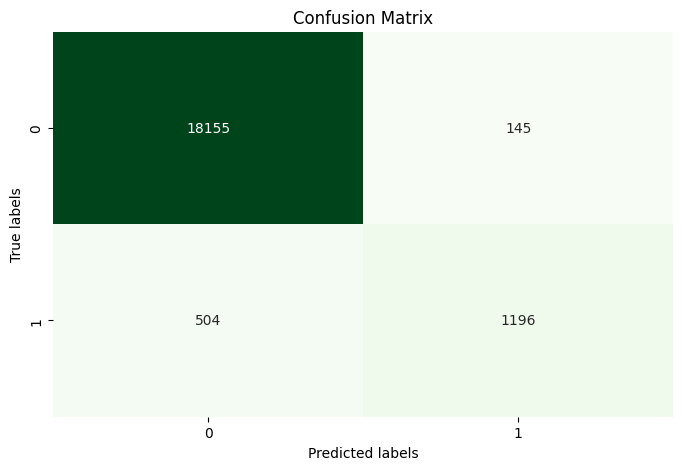

In [40]:
# plotting heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, yhat)

# plto the heatmap

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

Result Analysis

Given the values in the confusion matrix, the model has a relatively high number of true negatives and a reasonable number of true positives, suggesting it performs well on the negative class but may not be as strong on the positive class, as indicated by the number of false negatives. Precision, recall, and F1 score calculations would give a more nuanced understanding of its performance.

**2. Precision-Recall Curve** 

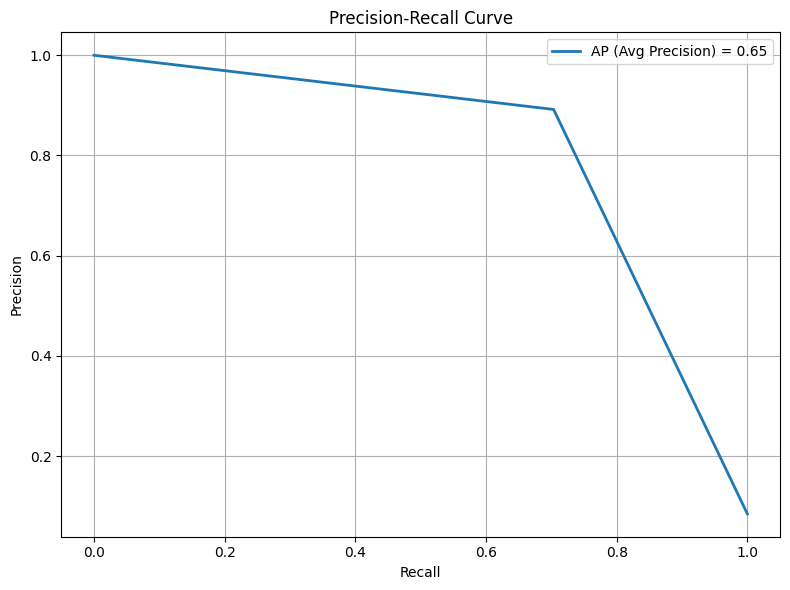

In [41]:
# Plotting Precision-recall Curves

from sklearn.metrics import precision_recall_curve,average_precision_score



# compute precison-recall pairs for different threshold values
precision, recall, threshold = precision_recall_curve(y_test, yhat)

avg_precision = average_precision_score(y_test, yhat)


#plotting the precision-recall curve

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AP (Avg Precision) = {avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Result Analysis

- The curve starts with high precision (close to 1.0) at the lowest levels of recall, which suggests that when the classifier declares an instance positive, it is very likely to be correct, but it does not cover all the positive instances.

- As recall increases, precision drops significantly. This indicates that in order to cover more of the positive instances (increasing recall), the classifier makes more false positive errors, reducing precision.

- At a certain point, there is a steep drop in precision, which happens when recall is slightly above 0.8. This suggests that the classifier begins to make many more false positive errors in its attempt to increase recall.

- The Average Precision (AP) score is indicated as 0.65. AP summarizes the shape of the precision-recall curve, and the value 0.65 suggests that the classifier has a reasonable balance of precision and recall overall.

- The AP score provides a single measure of performance across different threshold levels, taking into account the trade-off between precision and recall.

In conclusion, the classifier has good performance at the low recall levels, but its precision declines as the model attempts to increase recall. The Average Precision score of 0.65 indicates a moderate overall performance. This type of analysis is particularly useful when dealing with imbalanced datasets where the positive class (the class of interest) is much less frequent than the negative class.

**3. ROC Curve and AUC**

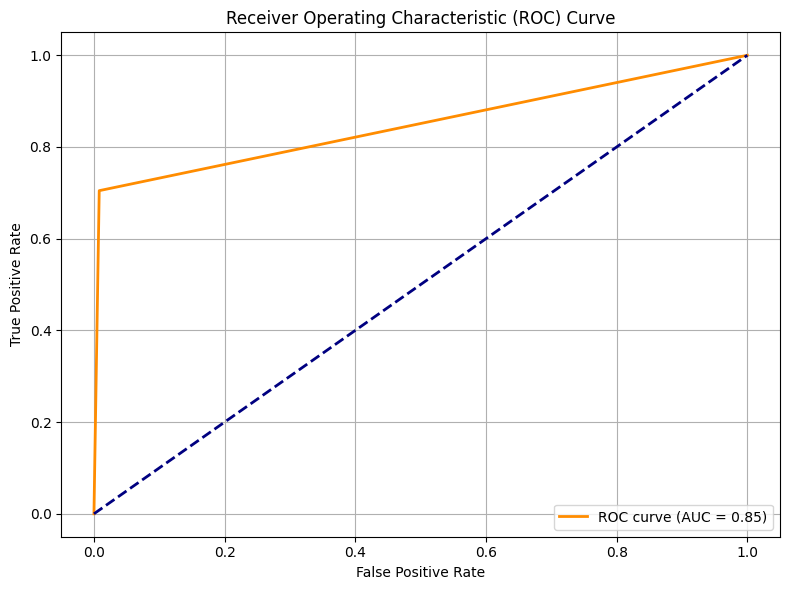

In [88]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Result Analysis

- The x-axis represents the False Positive Rate (FPR), and the y-axis represents the True Positive Rate (TPR), also known as sensitivity or recall.

- The curve starts at the bottom left of the plot (indicating a low FPR and TPR) and ends at the top right (indicating a high FPR and TPR).

- The ROC curve is above the diagonal dashed line that represents the performance of a random classifier (no better than random chance). The further the curve is above this line, the better the classifier's performance.

- The area under the curve (AUC) is 0.85, as indicated in the legend. The AUC ranges from 0 to 1, where an AUC of 1 represents a perfect classifier, and an AUC of 0.5 represents a worthless classifier. An AUC of 0.85 indicates that the classifier has a good level of separability, meaning it can distinguish between positive and negative classes well.

- The curve approaches close to the top-left corner of the graph, which indicates that the classifier can achieve a high true positive rate while maintaining a low false positive rate, but it does not reach the corner which would represent a perfect classifier.

Overall, the ROC curve and the AUC value suggest that the classifier has a good predictive ability to distinguish between the two classes. However, it is not perfect, as there are instances where it incorrectly classifies negative instances as positive (false positives), but these are relatively low as indicated by the low false positive rate for most thresholds.

**4. Scatter plot for classifying result** 

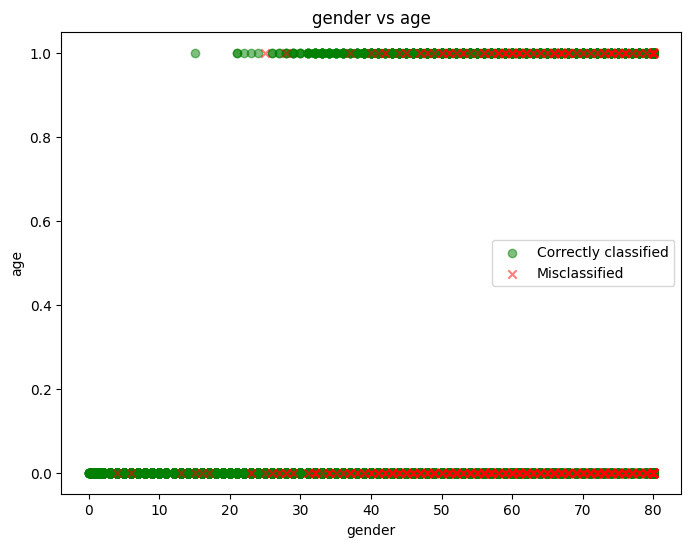

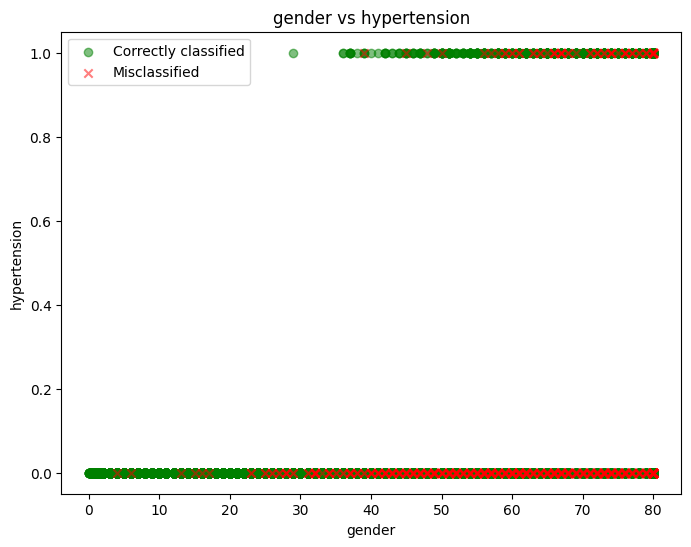

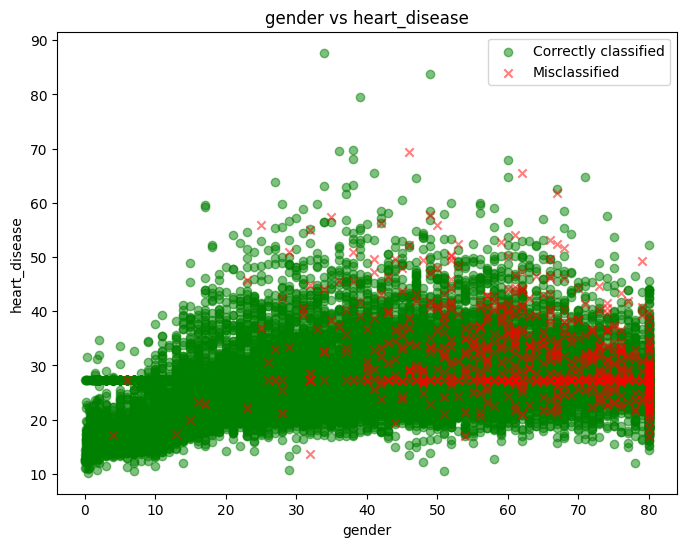

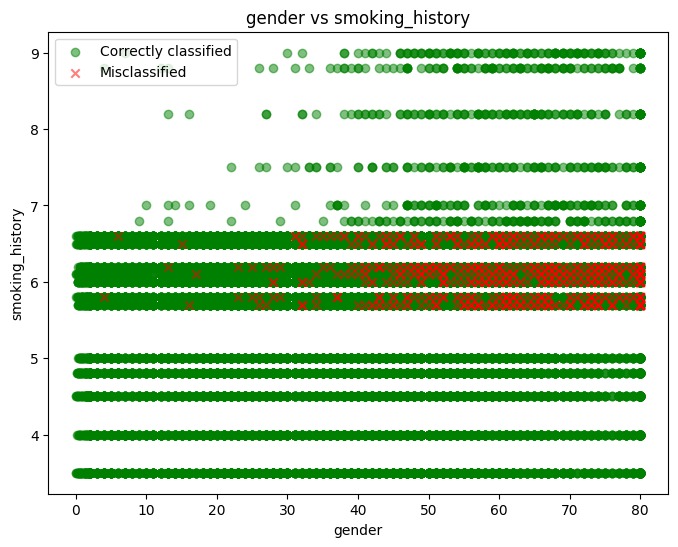

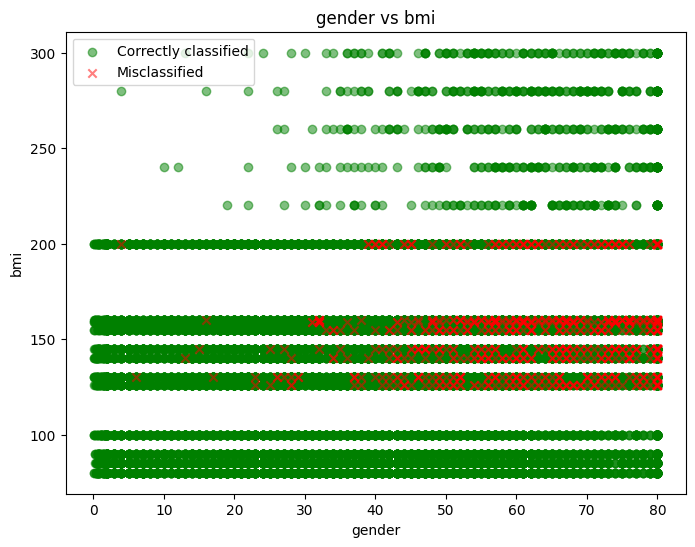

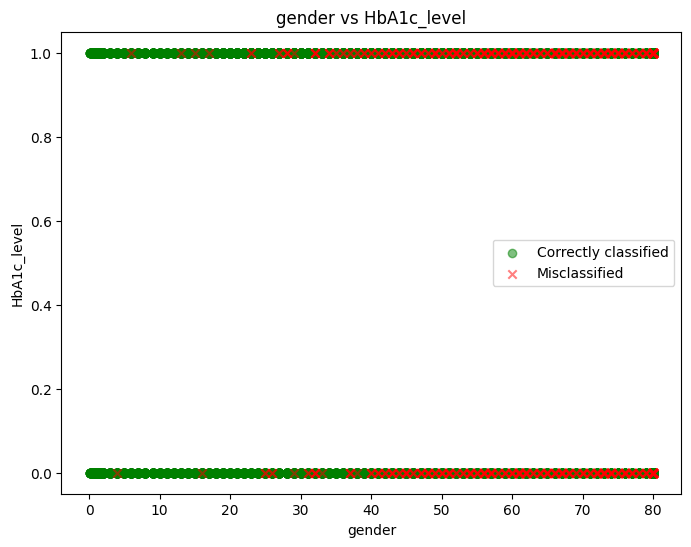

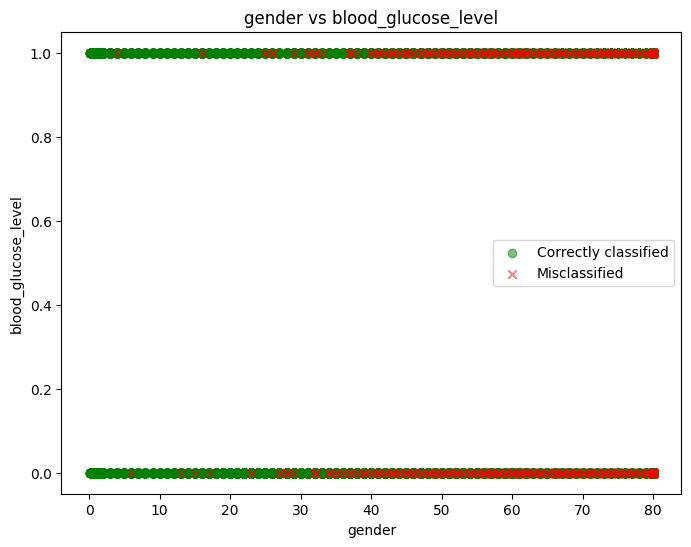

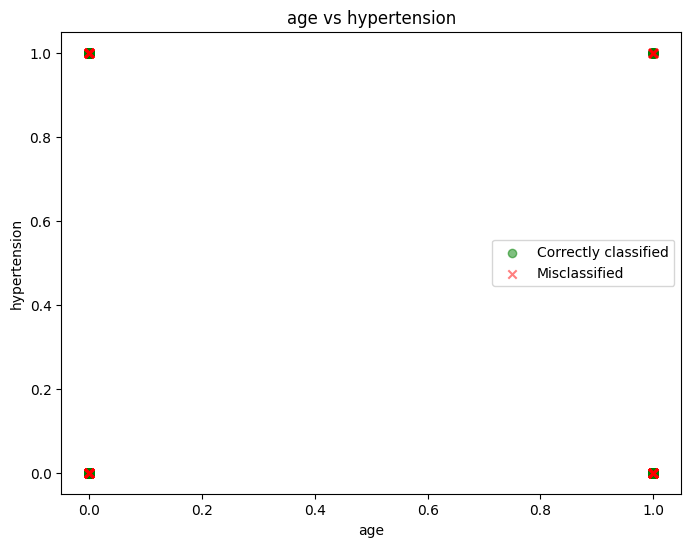

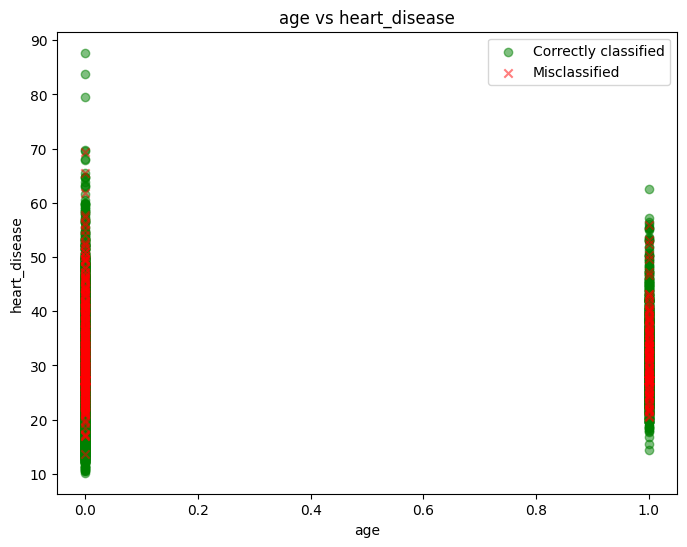

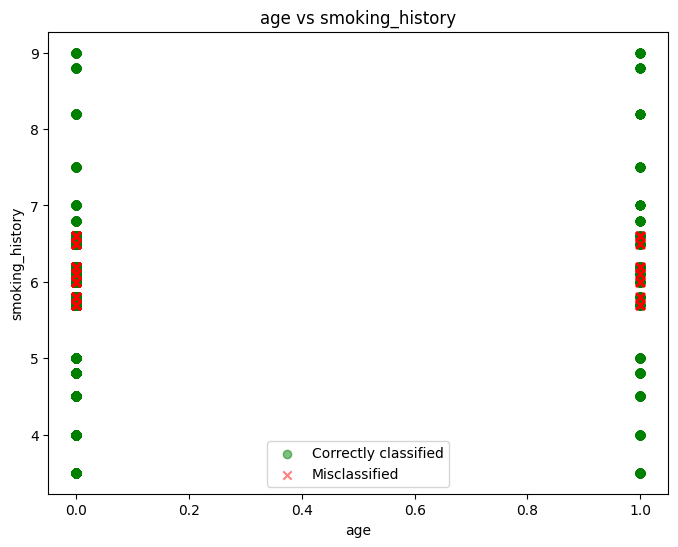

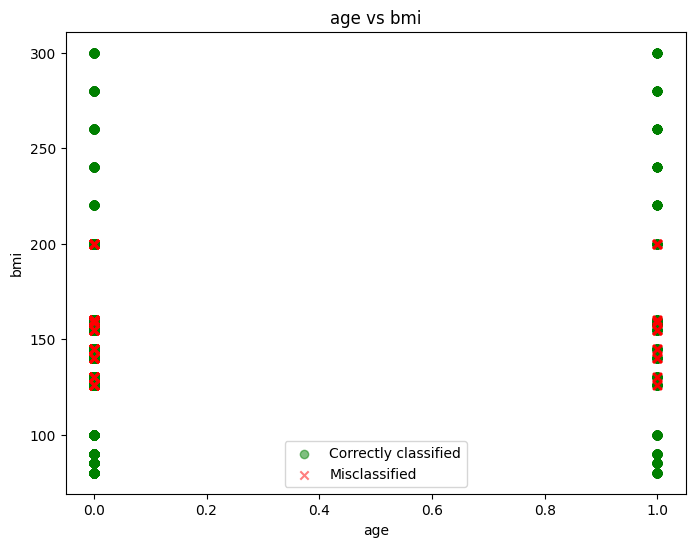

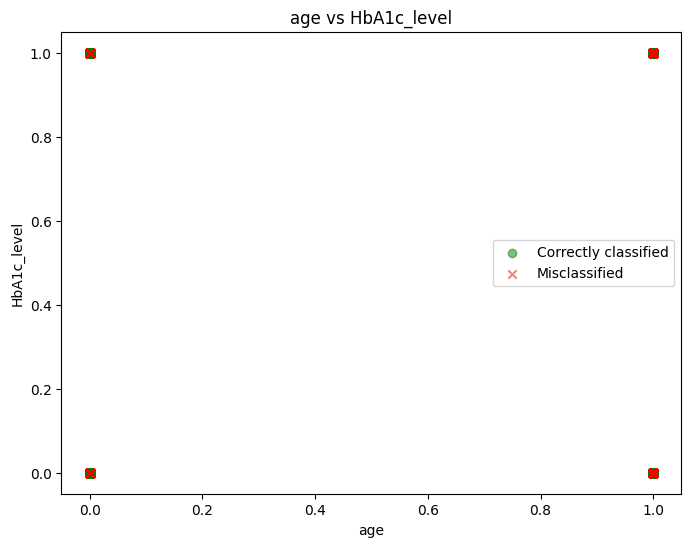

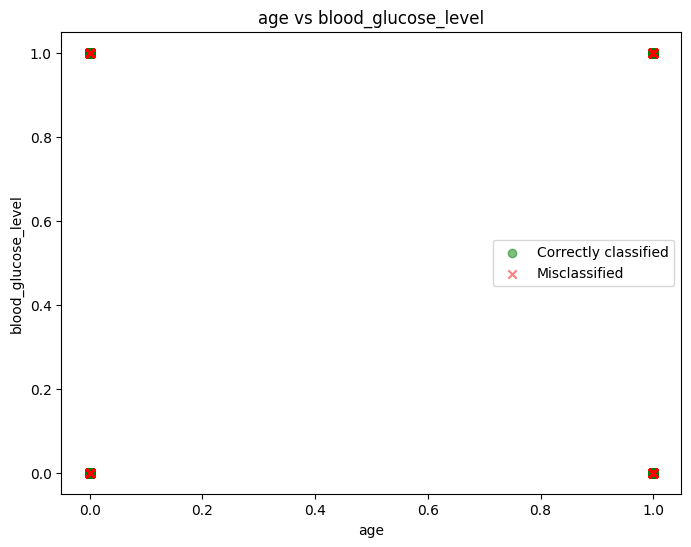

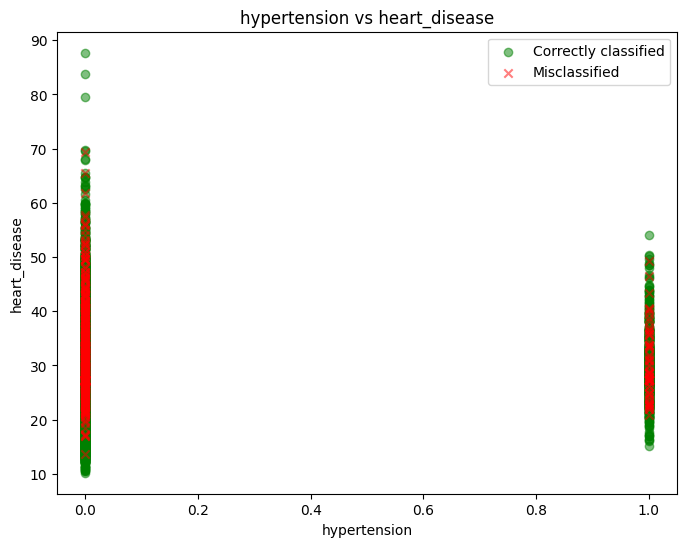

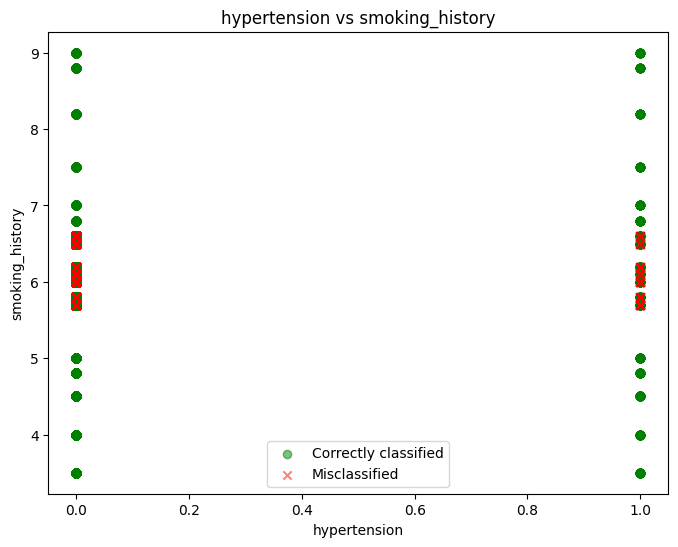

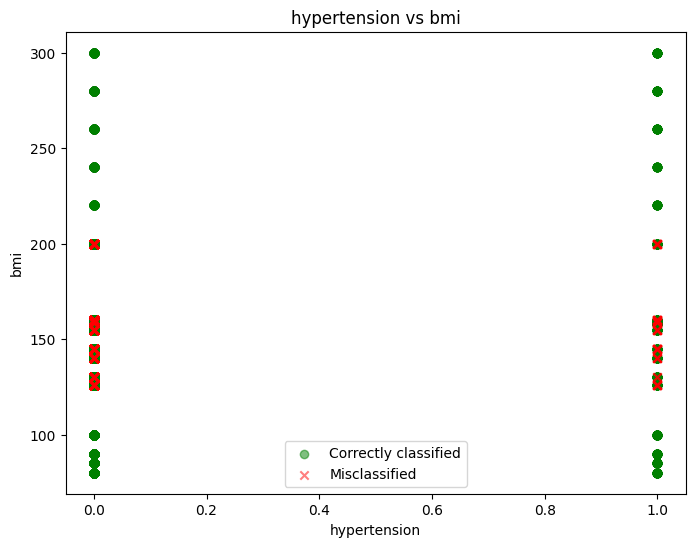

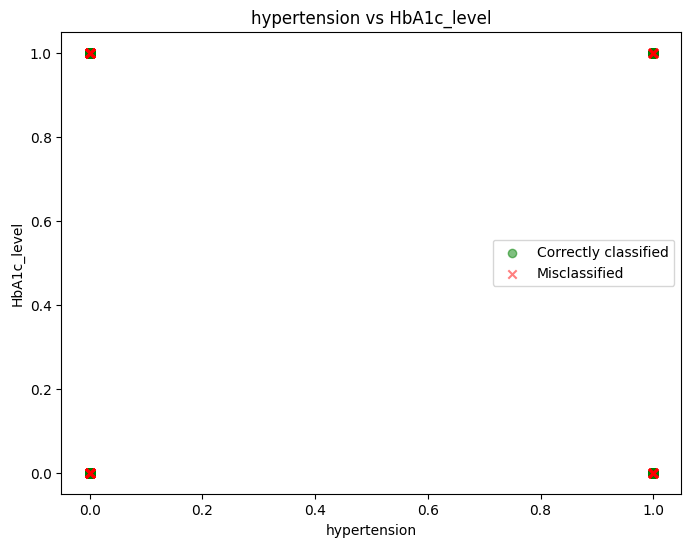

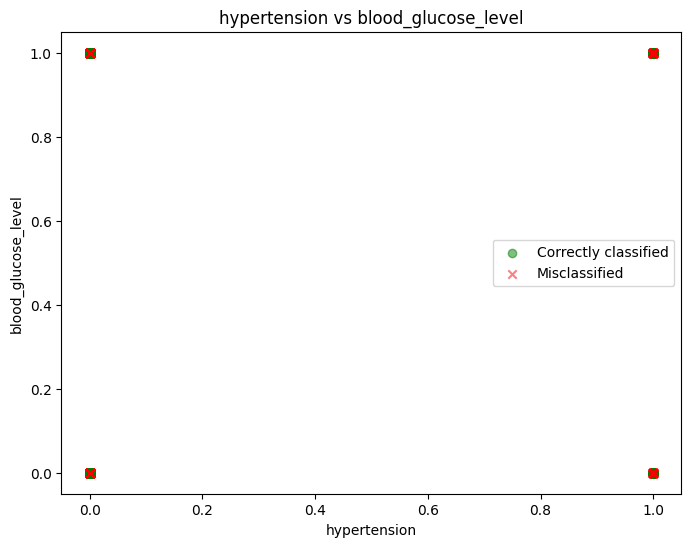

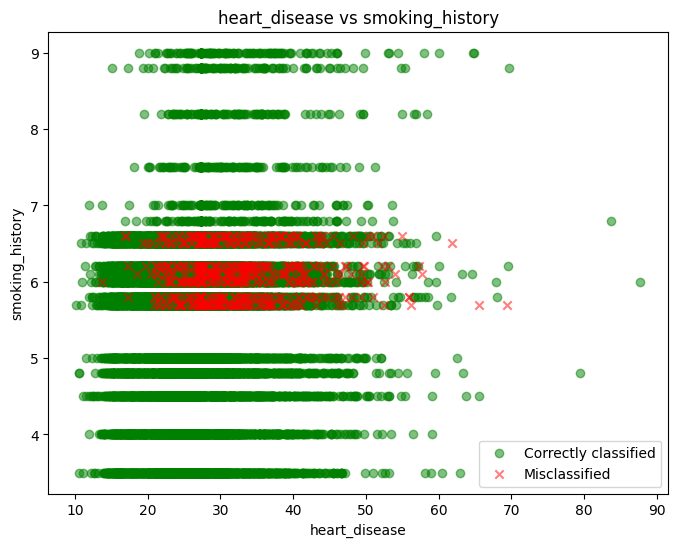

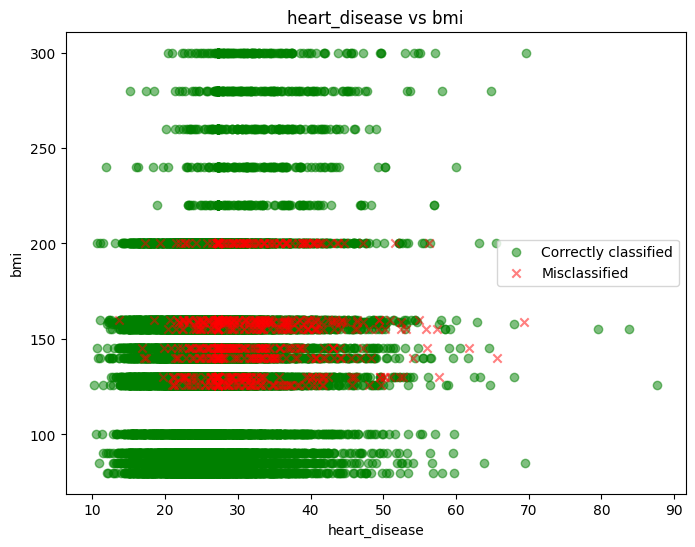

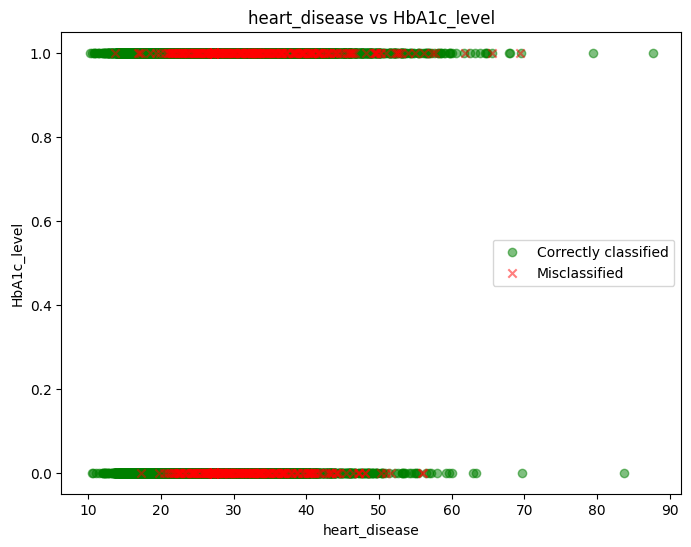

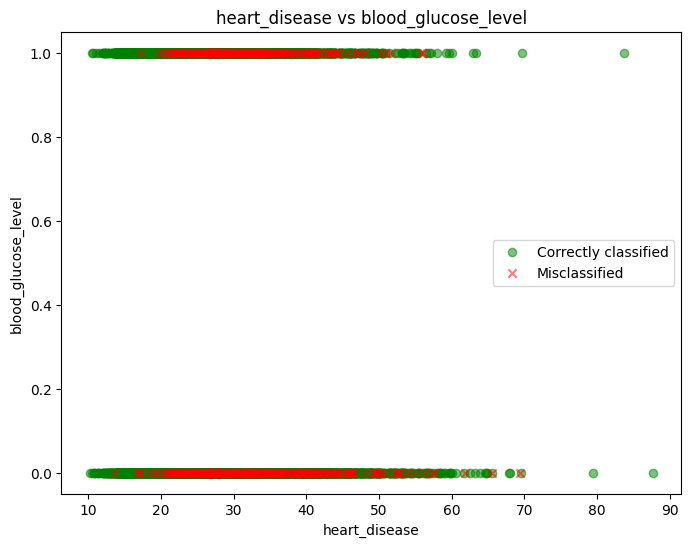

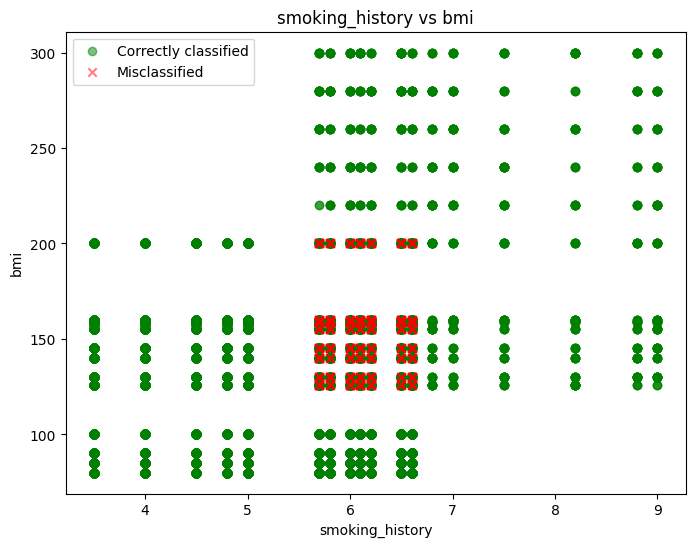

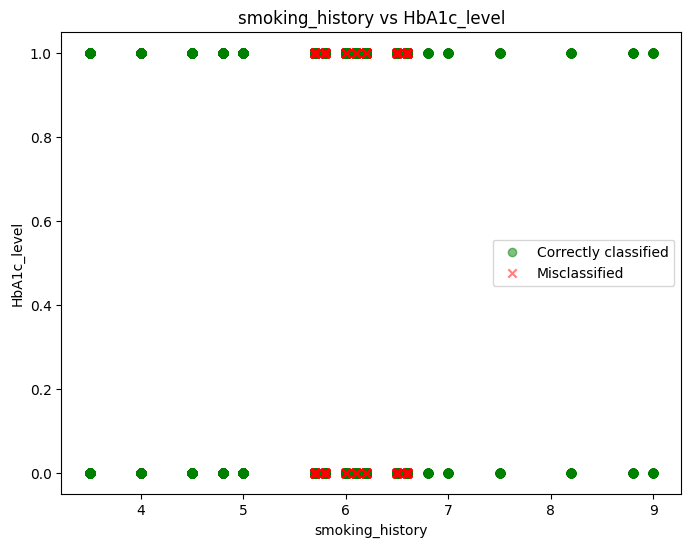

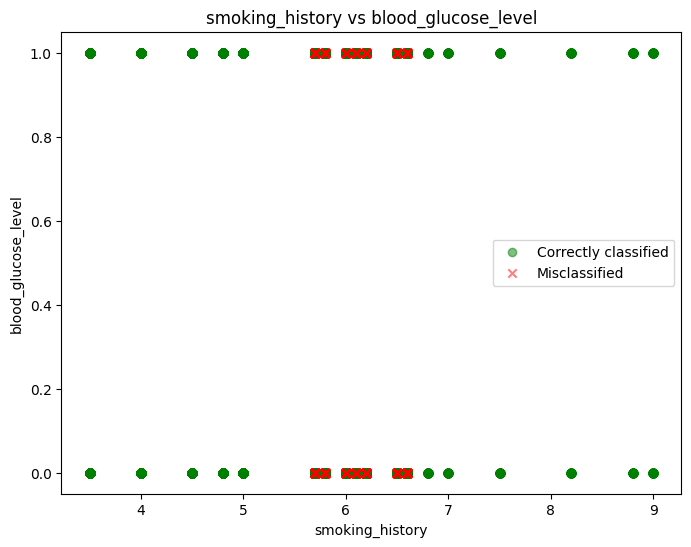

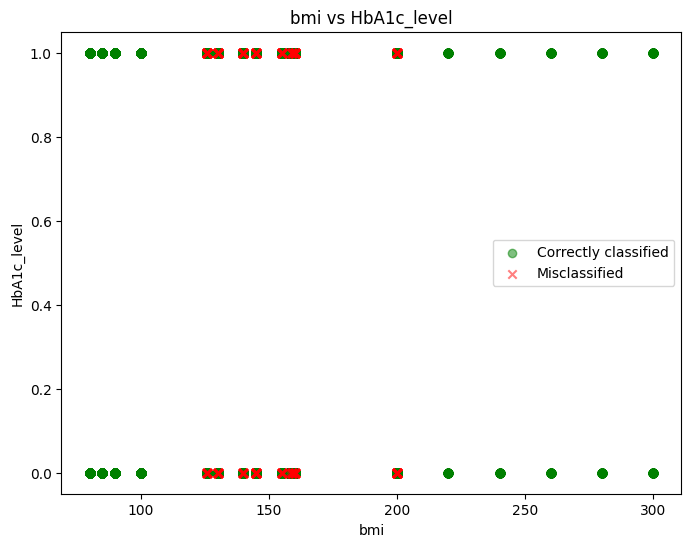

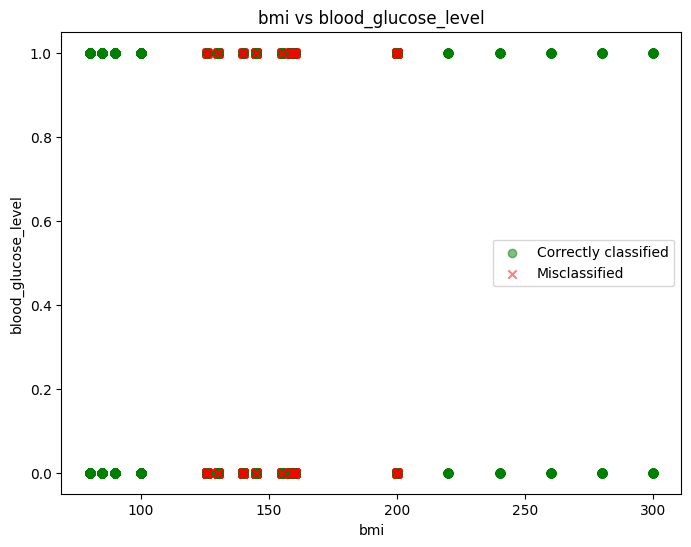

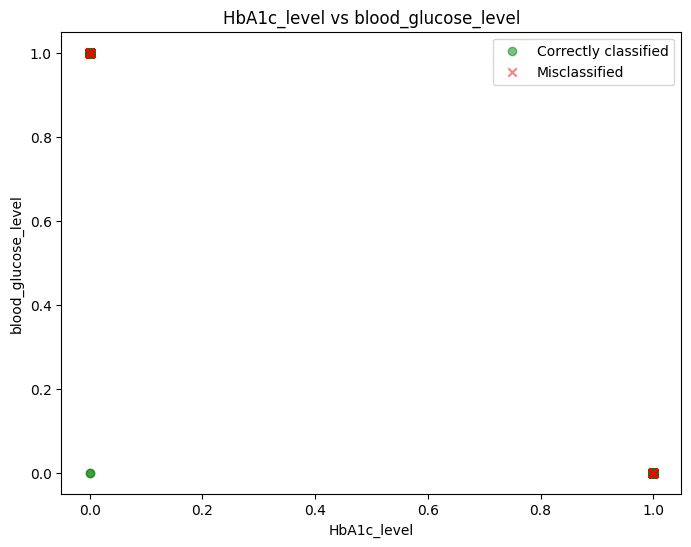

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already imported the necessary libraries and created 'data' DataFrame
feature = df.drop(columns='diabetes')

# Number of features
n_features = feature.shape[1]

# Dictionary for custom feature names
dict_feature = {0: "gender", 1: "age",2:'hypertension',3:'heart_disease',4:'smoking_history',5:'bmi',6:'HbA1c_level',7:'blood_glucose_level'}

# Plot
for i in range(n_features):
    for j in range(i + 1, n_features):
        plt.figure(figsize=(8, 6))

        # Plot correctly classified points in green
        correct_subset = data[data['correct']]
        plt.scatter(correct_subset.iloc[:, i], correct_subset.iloc[:, j],
                    c='green',
                    marker='o',
                    label='Correctly classified',
                    alpha=0.5)

        # Plot misclassified points in red
        wrong_subset = data[~data['correct']]
        plt.scatter(wrong_subset.iloc[:, i], wrong_subset.iloc[:, j],
                    c='red',
                    marker='x',
                    label='Misclassified',
                    alpha=0.5)

        plt.title(f'{dict_feature[i]} vs {dict_feature[j]}')
        plt.xlabel(dict_feature[i])
        plt.ylabel(dict_feature[j])
        plt.legend()
        plt.show()


## Feature Impotant

## Inference

**Save the model**

In [94]:
import joblib

best_model = grid.best_estimator_

# Save the best model to a file using joblib or another serialization method
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [96]:
grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history']),
                                                 ('standard', StandardScaler(),
                                                  ['bmi']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, random_state=0))])

**Save the preprocessing pipeline**

In [90]:
model = joblib.dump(grid.best_estimator_.named_steps['preprocessing'], 'preprocessor.pkl')